In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point
from datetime import timedelta
from datetime import datetime

# 모든 열이 출력되도록 설정
pd.set_option('display.max_columns', None)

In [12]:
import koreanize_matplotlib

In [146]:
import statsmodels.api as sm

In [147]:
import os
print(os.getcwd())

c:\Users\foma\Desktop\jjuwar\비어플\프로젝트_사회


In [148]:
real_data =pd.read_csv("./real_final.csv")

In [149]:
# 데이터 타입 지정
## 날짜타입으로 변환
real_data['영업자시작일'] = pd.to_datetime(real_data['영업자시작일'])
real_data['폐업일자'] = pd.to_datetime(real_data['폐업일자'])

## 범주형 변수
real_data['월 '] = real_data['월'].astype('category')
real_data['계절'] = real_data['계절'].astype('category')
real_data['카페유형'] = real_data['카페유형'].astype('category')
real_data['복층여부'] = real_data['복층여부'].astype('category')
real_data['폐업여부 '] = real_data['폐업여부'].astype('category')

In [150]:
real_data['폐업_YearMonth'] = real_data['폐업일자'].dt.to_period('M')  # 폐업 년-월
real_data['폐업_Quarter'] = real_data['폐업일자'].dt.to_period('Q')  # 폐업 분기 

real_data['영업연도'] = real_data['영업자시작일'].dt.year
real_data['폐업연도'] = real_data['폐업일자'].dt.year

In [151]:
real_data.head(3)

,업소명,행정동명,소재지도로명,영업자시작일,폐업일자,총면적,카페명,복층여부,x,y,폐업여부,카페유형,월,계절,xy_combined,geometry,고가프차 개수_500m,저가프차 개수_500m,중가프차 개수_500m,스타벅스 개수_500m,카페 개수_500m,음식점 개수_500m,총 영업일,소비자물가지수,분기_x,bank_500m 개수,elementary_500m 개수,middle_500m 개수,high_800m 개수,hospital_re_500m 개수,univ_1000m 개수,bus_250m 개수,subway_250m 존재여부,hospital_big_1000m 개수,행정동코드,1분기 평균,2분기 평균,3분기 평균,4분기 평균,월 임대료 평균 점수,환산 임대료 평균 점수,폐업분기,CSI_전분기 대비 변동,월,폐업여부,폐업_YearMonth,폐업_Quarter,영업연도,폐업연도
0,커피앤모바일,장위제1동,서울특별시 성북구 장월로 174 (장위동),2010-01-04,2010-04-02,17.36,커피앤모바일,0,127.053810,37.619456,1,개인 카페,1,겨울,"(127.0538105, 37.6194558)",POINT (960624.0880540323 1957872.7877259788),0,0,0,0,0,286,88,114.57,2010-2분기,1,2,2,1,0,2,20,0,0,11290760.0,-0.204450,-0.204372,-0.228888,-0.228432,-1.448152,-1.338849,2010-2분기,-0.63,1,1,2010-04,2010Q2,2010,2010.0
1,커피사업지원센타,원효로제2동,"서울특별시 용산구 효창원로12길 37, (원효로4가,(지상1층))",2010-01-04,NaT,89.10,커피사업지원센타,0,126.952872,37.533354,0,개인 카페,1,겨울,"(126.9528724, 37.533354)",POINT (951660.6788685165 1948367.32456717),0,0,0,0,0,185,5381,NaN,NaN,1,1,1,1,0,0,10,0,0,11170570.0,-0.152826,-0.212961,-0.204699,-0.129180,-0.076715,-0.227809,NaN,NaN,1,0,NaT,NaT,2010,NaN
2,할리스커피(동덕여대점),월곡제1동,"서울특별시 성북구 화랑로11길 23-6, (하월곡동,지하1층~지상1층(지하30평,그...",2010-01-04,NaT,390.88,할리스,0,127.041656,37.603577,0,고가 프랜차이즈,1,겨울,"(127.0416558, 37.6035772)",POINT (959542.8374800174 1956116.2944994038),0,0,0,0,0,670,5381,NaN,NaN,4,0,0,0,0,1,10,1,0,11290715.0,-0.224640,-0.184070,-0.189734,-0.189858,-0.637874,-0.736274,NaN,NaN,1,0,NaT,NaT,2010,NaN


In [152]:
real_data.tail(3)

,업소명,행정동명,소재지도로명,영업자시작일,폐업일자,총면적,카페명,복층여부,x,y,폐업여부,카페유형,월,계절,xy_combined,geometry,고가프차 개수_500m,저가프차 개수_500m,중가프차 개수_500m,스타벅스 개수_500m,카페 개수_500m,음식점 개수_500m,총 영업일,소비자물가지수,분기_x,bank_500m 개수,elementary_500m 개수,middle_500m 개수,high_800m 개수,hospital_re_500m 개수,univ_1000m 개수,bus_250m 개수,subway_250m 존재여부,hospital_big_1000m 개수,행정동코드,1분기 평균,2분기 평균,3분기 평균,4분기 평균,월 임대료 평균 점수,환산 임대료 평균 점수,폐업분기,CSI_전분기 대비 변동,월,폐업여부,폐업_YearMonth,폐업_Quarter,영업연도,폐업연도
47746,보난자커피 미아점,길음제1동,"서울특별시 성북구 동소문로 315, 현대백화점미아점 지상4층 (길음동)",2024-09-27,NaT,87.93,보난자커피 미아점,0,127.028747,37.608408,0,개인 카페,9,가을,"(127.0287466, 37.6084082)",POINT (958406.0508219984 1956657.9133306672),5,5,3,4,75,588,1,NaN,NaN,1,1,1,3,4,0,9,0,1,11290660.0,-0.271031,-0.271150,-0.249136,-0.265593,0.466966,0.447756,NaN,NaN,9,0,NaT,NaT,2024,NaN
47747,메가엠지씨커피 신정교사거리점,신정2동,"서울특별시 양천구 신목로 36, 대보빌딩 1층 101호 (신정동)",2024-09-27,NaT,58.50,메가커피,0,126.873787,37.518854,0,저가 프랜차이즈,9,가을,"(126.8737871, 37.5188543)",POINT (944662.6284049437 1946802.2462005657),2,3,1,1,51,267,1,NaN,NaN,1,2,1,1,0,0,7,0,0,11470630.0,-0.532241,-0.474827,-0.470145,-0.490720,-0.886023,-0.698797,NaN,NaN,9,0,NaT,NaT,2024,NaN
47748,벤티프레소 가산한라원앤원점,가산동,"서울특별시 금천구 가산디지털2로 101, 107호 (가산동)",2024-09-27,NaT,54.61,벤티프레소 가산한라원앤원점,0,126.879523,37.476935,0,개인 카페,9,가을,"(126.8795231, 37.4769354)",POINT (945138.854951236 1942148.2243635769),5,11,7,3,133,608,1,NaN,NaN,12,0,0,0,0,0,5,0,0,11545510.0,1.994287,2.073505,2.084836,1.973438,-0.227761,-0.415384,NaN,NaN,9,0,NaT,NaT,2024,NaN


In [153]:
real_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47749 entries, 0 to 47748
Data columns (total 49 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   업소명                    47749 non-null  object        
 1   행정동명                   47749 non-null  object        
 2   소재지도로명                 47749 non-null  object        
 3   영업자시작일                 47749 non-null  datetime64[ns]
 4   폐업일자                   19505 non-null  datetime64[ns]
 5   총면적                    47749 non-null  float64       
 6   카페명                    47749 non-null  object        
 7   복층여부                   47749 non-null  category      
 8   x                      47749 non-null  float64       
 9   y                      47749 non-null  float64       
 10  폐업여부                   47749 non-null  int64         
 11  카페유형                   47749 non-null  category      
 12  월                      47749 non-null  int64         
 13  계

In [154]:
real_data.isna().sum()

업소명                          0
행정동명                         0
소재지도로명                       0
영업자시작일                       0
폐업일자                     28244
총면적                          0
카페명                          0
복층여부                         0
x                            0
y                            0
폐업여부                         0
카페유형                         0
월                            0
계절                           0
xy_combined                  0
geometry                     0
고가프차 개수_500m                 0
저가프차 개수_500m                 0
중가프차 개수_500m                 0
스타벅스 개수_500m                 0
카페 개수_500m                   0
음식점 개수_500m                  0
총 영업일                        0
소비자물가지수                  28244
분기_x                     28244
bank_500m 개수                 0
elementary_500m 개수           0
middle_500m 개수               0
high_800m 개수                 0
hospital_re_500m 개수          0
univ_1000m 개수                0
bus_250m 개수                  0
subway_2

In [155]:
real_data.columns

Index(['업소명', '행정동명', '소재지도로명', '영업자시작일', '폐업일자', '총면적', '카페명', '복층여부', 'x',
       'y', '폐업여부', '카페유형', '월', '계절', 'xy_combined', 'geometry',
       '고가프차 개수_500m', '저가프차 개수_500m', '중가프차 개수_500m', '스타벅스 개수_500m',
       '카페 개수_500m', '음식점 개수_500m', '총 영업일', '소비자물가지수', '분기_x', 'bank_500m 개수',
       'elementary_500m 개수', 'middle_500m 개수', 'high_800m 개수',
       'hospital_re_500m 개수', 'univ_1000m 개수', 'bus_250m 개수',
       'subway_250m 존재여부', 'hospital_big_1000m 개수', '행정동코드', '1분기 평균',
       '2분기 평균', '3분기 평균', '4분기 평균', '월 임대료 평균 점수', '환산 임대료 평균 점수', '폐업분기',
       'CSI_전분기 대비 변동', '월 ', '폐업여부 ', '폐업_YearMonth', '폐업_Quarter', '영업연도',
       '폐업연도'],
      dtype='object')

# 카페 폐업,창업 EDA

In [156]:
real_data[[ '폐업일자']].dropna()

,폐업일자
0,2010-04-02
3,2011-12-05
4,2010-05-18
5,2011-01-03
6,2016-11-24
...,...
47615,2024-09-21
47623,2024-09-26
47624,2024-09-23
47655,2024-09-21


In [157]:
real_data.head(1)

,업소명,행정동명,소재지도로명,영업자시작일,폐업일자,총면적,카페명,복층여부,x,y,폐업여부,카페유형,월,계절,xy_combined,geometry,고가프차 개수_500m,저가프차 개수_500m,중가프차 개수_500m,스타벅스 개수_500m,카페 개수_500m,음식점 개수_500m,총 영업일,소비자물가지수,분기_x,bank_500m 개수,elementary_500m 개수,middle_500m 개수,high_800m 개수,hospital_re_500m 개수,univ_1000m 개수,bus_250m 개수,subway_250m 존재여부,hospital_big_1000m 개수,행정동코드,1분기 평균,2분기 평균,3분기 평균,4분기 평균,월 임대료 평균 점수,환산 임대료 평균 점수,폐업분기,CSI_전분기 대비 변동,월,폐업여부,폐업_YearMonth,폐업_Quarter,영업연도,폐업연도
0,커피앤모바일,장위제1동,서울특별시 성북구 장월로 174 (장위동),2010-01-04,2010-04-02,17.36,커피앤모바일,0,127.05381,37.619456,1,개인 카페,1,겨울,"(127.0538105, 37.6194558)",POINT (960624.0880540323 1957872.7877259788),0,0,0,0,0,286,88,114.57,2010-2분기,1,2,2,1,0,2,20,0,0,11290760.0,-0.20445,-0.204372,-0.228888,-0.228432,-1.448152,-1.338849,2010-2분기,-0.63,1,1,2010-04,2010Q2,2010,2010.0


## 누적 개업수, 누적 폐업수
- 개업률 = 현재 운영중인 카페 / 누적 개업수
- 폐업률 = 현재 운영중인 카페 / 누적 폐업수

### 연도별

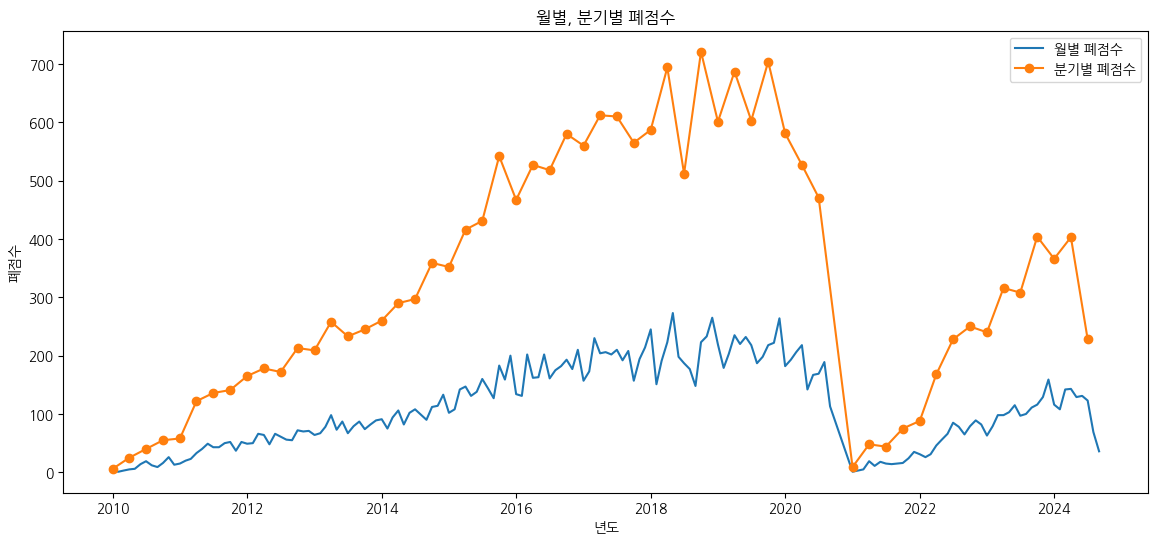

In [158]:
real_data['폐업_YearMonth'] = real_data['폐업일자'].dt.to_period('M')  # 폐업 년-월
real_data['폐업_Quarter'] = real_data['폐업일자'].dt.to_period('Q')  # 폐업 분기 

# Count by year-month and by quarter
monthly_counts = real_data['폐업_YearMonth'].value_counts().sort_index()
quarterly_counts = real_data['폐업_Quarter'].value_counts().sort_index()

# Convert to time series format
monthly_counts_ts = monthly_counts.to_timestamp()
quarterly_counts_ts = quarterly_counts.to_timestamp()

# Plot the time series for both monthly and quarterly counts
plt.figure(figsize=(14, 6))
plt.plot(monthly_counts_ts, label='월별 폐점수')
plt.plot(quarterly_counts_ts, label='분기별 폐점수', marker='o')
plt.title('월별, 분기별 폐점수')
plt.xlabel('년도')
plt.ylabel('폐점수')
plt.legend()
plt.show()

In [159]:
real_data[real_data['폐업_Quarter'] =='2020Q1']['폐업여부'].value_counts()

폐업여부
1    581
Name: count, dtype: int64

In [160]:
real_data[real_data['폐업_Quarter'] =='2020Q4']['폐업여부'].value_counts()

Series([], Name: count, dtype: int64)

In [161]:
real_data[real_data['폐업_YearMonth'] =='2020-10']

,업소명,행정동명,소재지도로명,영업자시작일,폐업일자,총면적,카페명,복층여부,x,y,폐업여부,카페유형,월,계절,xy_combined,geometry,고가프차 개수_500m,저가프차 개수_500m,중가프차 개수_500m,스타벅스 개수_500m,카페 개수_500m,음식점 개수_500m,총 영업일,소비자물가지수,분기_x,bank_500m 개수,elementary_500m 개수,middle_500m 개수,high_800m 개수,hospital_re_500m 개수,univ_1000m 개수,bus_250m 개수,subway_250m 존재여부,hospital_big_1000m 개수,행정동코드,1분기 평균,2분기 평균,3분기 평균,4분기 평균,월 임대료 평균 점수,환산 임대료 평균 점수,폐업분기,CSI_전분기 대비 변동,월,폐업여부,폐업_YearMonth,폐업_Quarter,영업연도,폐업연도


In [162]:
real_data[real_data['폐업_YearMonth'] =='2020-11']

,업소명,행정동명,소재지도로명,영업자시작일,폐업일자,총면적,카페명,복층여부,x,y,폐업여부,카페유형,월,계절,xy_combined,geometry,고가프차 개수_500m,저가프차 개수_500m,중가프차 개수_500m,스타벅스 개수_500m,카페 개수_500m,음식점 개수_500m,총 영업일,소비자물가지수,분기_x,bank_500m 개수,elementary_500m 개수,middle_500m 개수,high_800m 개수,hospital_re_500m 개수,univ_1000m 개수,bus_250m 개수,subway_250m 존재여부,hospital_big_1000m 개수,행정동코드,1분기 평균,2분기 평균,3분기 평균,4분기 평균,월 임대료 평균 점수,환산 임대료 평균 점수,폐업분기,CSI_전분기 대비 변동,월,폐업여부,폐업_YearMonth,폐업_Quarter,영업연도,폐업연도


In [163]:
real_data[real_data['폐업_YearMonth'] =='2020-12']

,업소명,행정동명,소재지도로명,영업자시작일,폐업일자,총면적,카페명,복층여부,x,y,폐업여부,카페유형,월,계절,xy_combined,geometry,고가프차 개수_500m,저가프차 개수_500m,중가프차 개수_500m,스타벅스 개수_500m,카페 개수_500m,음식점 개수_500m,총 영업일,소비자물가지수,분기_x,bank_500m 개수,elementary_500m 개수,middle_500m 개수,high_800m 개수,hospital_re_500m 개수,univ_1000m 개수,bus_250m 개수,subway_250m 존재여부,hospital_big_1000m 개수,행정동코드,1분기 평균,2분기 평균,3분기 평균,4분기 평균,월 임대료 평균 점수,환산 임대료 평균 점수,폐업분기,CSI_전분기 대비 변동,월,폐업여부,폐업_YearMonth,폐업_Quarter,영업연도,폐업연도


In [164]:
real_data[real_data['폐업_Quarter'] =='2020Q4']

,업소명,행정동명,소재지도로명,영업자시작일,폐업일자,총면적,카페명,복층여부,x,y,폐업여부,카페유형,월,계절,xy_combined,geometry,고가프차 개수_500m,저가프차 개수_500m,중가프차 개수_500m,스타벅스 개수_500m,카페 개수_500m,음식점 개수_500m,총 영업일,소비자물가지수,분기_x,bank_500m 개수,elementary_500m 개수,middle_500m 개수,high_800m 개수,hospital_re_500m 개수,univ_1000m 개수,bus_250m 개수,subway_250m 존재여부,hospital_big_1000m 개수,행정동코드,1분기 평균,2분기 평균,3분기 평균,4분기 평균,월 임대료 평균 점수,환산 임대료 평균 점수,폐업분기,CSI_전분기 대비 변동,월,폐업여부,폐업_YearMonth,폐업_Quarter,영업연도,폐업연도


In [165]:
real_data.columns

Index(['업소명', '행정동명', '소재지도로명', '영업자시작일', '폐업일자', '총면적', '카페명', '복층여부', 'x',
       'y', '폐업여부', '카페유형', '월', '계절', 'xy_combined', 'geometry',
       '고가프차 개수_500m', '저가프차 개수_500m', '중가프차 개수_500m', '스타벅스 개수_500m',
       '카페 개수_500m', '음식점 개수_500m', '총 영업일', '소비자물가지수', '분기_x', 'bank_500m 개수',
       'elementary_500m 개수', 'middle_500m 개수', 'high_800m 개수',
       'hospital_re_500m 개수', 'univ_1000m 개수', 'bus_250m 개수',
       'subway_250m 존재여부', 'hospital_big_1000m 개수', '행정동코드', '1분기 평균',
       '2분기 평균', '3분기 평균', '4분기 평균', '월 임대료 평균 점수', '환산 임대료 평균 점수', '폐업분기',
       'CSI_전분기 대비 변동', '월 ', '폐업여부 ', '폐업_YearMonth', '폐업_Quarter', '영업연도',
       '폐업연도'],
      dtype='object')

In [166]:
treasure = real_data.copy() # treasure 지켜.. 

In [167]:
# Converting date columns to datetime format for analysis
real_data['영업자시작일'] = pd.to_datetime(real_data['영업자시작일'], errors='coerce')
real_data['폐업일자'] = pd.to_datetime(real_data['폐업일자'], errors='coerce')

# Creating '영업연도' and '폐업연도' columns for easier grouping by year
real_data['영업연도'] = real_data['영업자시작일'].dt.year
real_data['폐업연도'] = real_data['폐업일자'].dt.year

In [168]:
data = real_data.copy()

In [169]:
# Converting date columns to datetime format for analysis
data['영업자시작일'] = pd.to_datetime(data['영업자시작일'], errors='coerce')
data['폐업일자'] = pd.to_datetime(data['폐업일자'], errors='coerce')

# Creating '영업연도' and '폐업연도' columns for easier grouping by year
data['영업연도'] = data['영업자시작일'].dt.year
data['폐업연도'] = data['폐업일자'].dt.year

# Calculating the number of businesses opened and closed by year
yearly_opened = data.groupby('영업연도').size()
yearly_closed = data.groupby('폐업연도').size()

# Calculating the closure rate and opening rate per year
# Closure rate is defined as (number of closures in a year / total operating businesses that year)
# Opening rate is defined as (number of openings in a year / total businesses up to that year)
cumulative_opened = yearly_opened.cumsum()
cumulative_operating = cumulative_opened - yearly_closed.cumsum().fillna(0)
closure_rate = yearly_closed / cumulative_operating * 100
opening_rate = yearly_opened / cumulative_opened * 100

# Compiling the data into a DataFrame for display
eda_results = pd.DataFrame({
    '개업수': yearly_opened,
    '폐업수': yearly_closed,
    '폐업률 (%)': closure_rate,
    '개업률 (%)': opening_rate
}).fillna(0)


In [170]:
eda_results

,개업수,폐업수,폐업률 (%),개업률 (%)
2010,1623,126,8.416834,100.000000
2011,2113,457,14.494133,56.557816
2012,2359,728,15.217391,38.703856
2013,2684,945,14.487199,30.572958
2014,3593,1206,13.535354,29.041384
2015,3464,1741,16.373554,21.874211
2016,3795,2092,16.958495,19.331669
2017,4233,2347,16.502602,17.738015
2018,4280,2514,15.724293,15.207504
2019,5636,2595,13.637080,16.684429


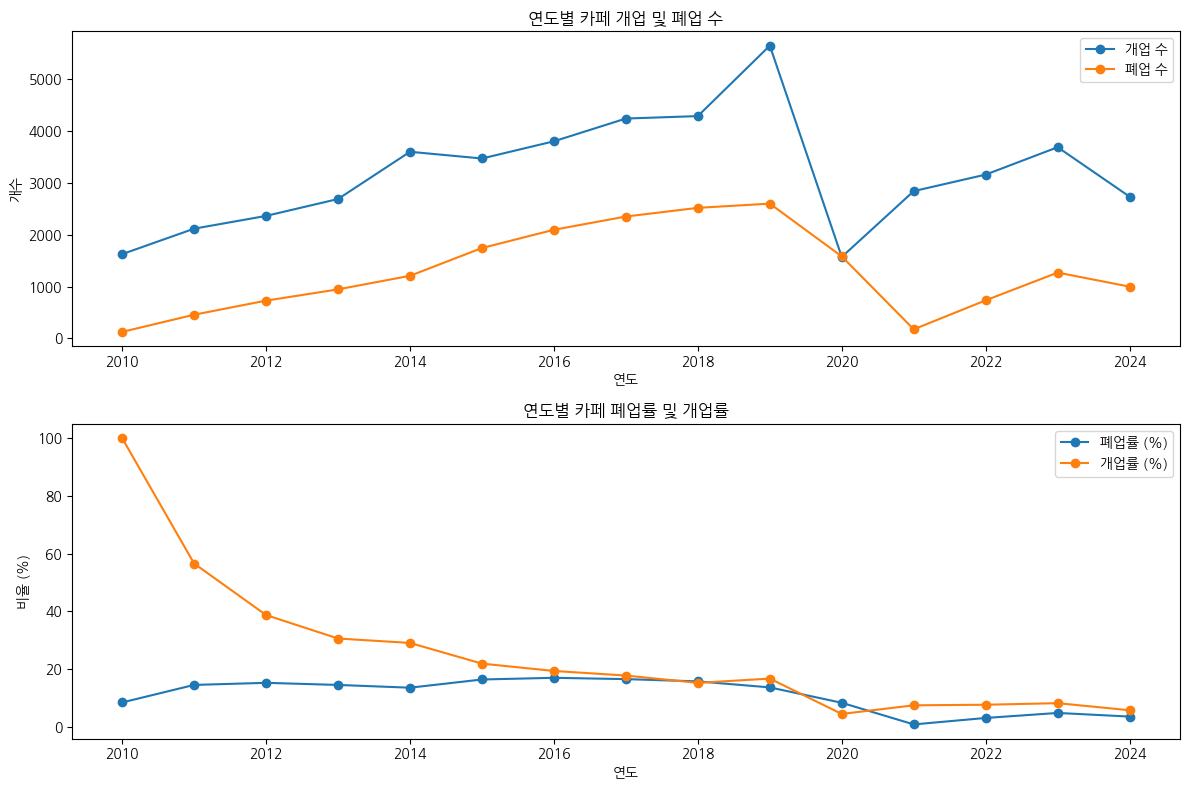

In [171]:
# Re-plotting with titles and legends in Korean
plt.figure(figsize=(12, 8))

# Plot for number of openings and closures
plt.subplot(2, 1, 1)
plt.plot(eda_results.index, eda_results['개업수'], label='개업 수', marker='o')
plt.plot(eda_results.index, eda_results['폐업수'], label='폐업 수', marker='o')
plt.xlabel('연도')
plt.ylabel('개수')
plt.title('연도별 카페 개업 및 폐업 수')
plt.legend()

# Plot for closure rate and opening rate
plt.subplot(2, 1, 2)
plt.plot(eda_results.index, eda_results['폐업률 (%)'], label='폐업률 (%)', marker='o')
plt.plot(eda_results.index, eda_results['개업률 (%)'], label='개업률 (%)', marker='o')
plt.xlabel('연도')
plt.ylabel('비율 (%)')
plt.title('연도별 카페 폐업률 및 개업률')
plt.legend()

plt.tight_layout()
plt.show()


In [172]:
data.head(1)

,업소명,행정동명,소재지도로명,영업자시작일,폐업일자,총면적,카페명,복층여부,x,y,폐업여부,카페유형,월,계절,xy_combined,geometry,고가프차 개수_500m,저가프차 개수_500m,중가프차 개수_500m,스타벅스 개수_500m,카페 개수_500m,음식점 개수_500m,총 영업일,소비자물가지수,분기_x,bank_500m 개수,elementary_500m 개수,middle_500m 개수,high_800m 개수,hospital_re_500m 개수,univ_1000m 개수,bus_250m 개수,subway_250m 존재여부,hospital_big_1000m 개수,행정동코드,1분기 평균,2분기 평균,3분기 평균,4분기 평균,월 임대료 평균 점수,환산 임대료 평균 점수,폐업분기,CSI_전분기 대비 변동,월,폐업여부,폐업_YearMonth,폐업_Quarter,영업연도,폐업연도
0,커피앤모바일,장위제1동,서울특별시 성북구 장월로 174 (장위동),2010-01-04,2010-04-02,17.36,커피앤모바일,0,127.05381,37.619456,1,개인 카페,1,겨울,"(127.0538105, 37.6194558)",POINT (960624.0880540323 1957872.7877259788),0,0,0,0,0,286,88,114.57,2010-2분기,1,2,2,1,0,2,20,0,0,11290760.0,-0.20445,-0.204372,-0.228888,-0.228432,-1.448152,-1.338849,2010-2분기,-0.63,1,1,2010-04,2010Q2,2010,2010.0


In [173]:
data.columns

Index(['업소명', '행정동명', '소재지도로명', '영업자시작일', '폐업일자', '총면적', '카페명', '복층여부', 'x',
       'y', '폐업여부', '카페유형', '월', '계절', 'xy_combined', 'geometry',
       '고가프차 개수_500m', '저가프차 개수_500m', '중가프차 개수_500m', '스타벅스 개수_500m',
       '카페 개수_500m', '음식점 개수_500m', '총 영업일', '소비자물가지수', '분기_x', 'bank_500m 개수',
       'elementary_500m 개수', 'middle_500m 개수', 'high_800m 개수',
       'hospital_re_500m 개수', 'univ_1000m 개수', 'bus_250m 개수',
       'subway_250m 존재여부', 'hospital_big_1000m 개수', '행정동코드', '1분기 평균',
       '2분기 평균', '3분기 평균', '4분기 평균', '월 임대료 평균 점수', '환산 임대료 평균 점수', '폐업분기',
       'CSI_전분기 대비 변동', '월 ', '폐업여부 ', '폐업_YearMonth', '폐업_Quarter', '영업연도',
       '폐업연도'],
      dtype='object')

### 연도별 카페 유형별

In [174]:
# Grouping by '카페 유형' and '영업연도' for openings, and '카페 유형' and '폐업연도' for closures
# Ensuring '카페 유형' column exists and examining its unique values for accurate analysis
if '카페유형' in data.columns:
    # Calculating yearly opened and closed cafés by type
    yearly_opened_by_type = data.groupby(['카페유형', '영업연도']).size()
    yearly_closed_by_type = data.groupby(['카페유형', '폐업연도']).size()

    # Calculating cumulative opened cafés by type for each year
    cumulative_opened_by_type = yearly_opened_by_type.groupby(level=0).cumsum()
    cumulative_operating_by_type = cumulative_opened_by_type - yearly_closed_by_type.groupby(level=0).cumsum().fillna(0)

    # Calculating closure and opening rates by type
    closure_rate_by_type = yearly_closed_by_type / cumulative_operating_by_type * 100
    opening_rate_by_type = yearly_opened_by_type / cumulative_opened_by_type * 100

    # Creating a DataFrame to display results for each type
    eda_results_by_type = pd.DataFrame({
        '개업수': yearly_opened_by_type,
        '폐업수': yearly_closed_by_type,
        '폐업률 (%)': closure_rate_by_type,
        '개업률 (%)': opening_rate_by_type
    }).fillna(0)

else:
    eda_results_by_type = None

eda_results_by_type


C:\Users\foma\AppData\Local\Temp\ipykernel_10624\3074375825.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  yearly_opened_by_type = data.groupby(['카페유형', '영업연도']).size()
C:\Users\foma\AppData\Local\Temp\ipykernel_10624\3074375825.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  yearly_closed_by_type = data.groupby(['카페유형', '폐업연도']).size()
C:\Users\foma\AppData\Local\Temp\ipykernel_10624\3074375825.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future 

개업수   폐업수    폐업률 (%)     개업률 (%)
카페유형                                            
개인 카페    2010  1552   124   8.683473  100.000000
         2011  2030   448  14.883721   56.672250
         2012  2273   717  15.703022   38.821520
         2013  2580   937  15.090997   30.586841
         2014  3420  1181  13.979640   28.848587
         2015  3251  1701  17.013403   21.521250
         2016  3582  2016  17.433414   19.167380
         2017  3872  2263  17.179078   17.163121
         2018  3976  2432  16.525107   14.983419
         2019  4660  2490  14.745070   14.937813
         2020  1438  1516   9.018978    4.406447
         2021  2499   172   0.898829    7.112971
         2022  2722   724   3.425759    7.190596
         2023  2956  1247   5.459003    7.243145
         2024  2224   972   4.034032    5.167887
고가 프랜차이즈 2010    45     2   4.651163  100.000000
         2011    55     8   8.888889   55.000000
         2012    44     7   5.511811   30.555556
         2013    50     6   3.508772   25.773196
         2014    53    13   6.161137   21.457490
         2015    48    23   9.745763   16.271186
         2016    54    44  17.886179   15.472779
         2017   152    35   9.641873   30.339321
         2018    77    34   8.374384   13.321799
         2019   659    47   4.616896   53.274050
         2020    27    33   3.260870    2.136076
         2021    44     2   0.189753    3.363914
         2022    35     3   0.276243    2.606106
         2023   190     4   0.314465   12.393999
         2024    74     4   0.298063    4.604854
저가 프랜차이즈 2010     0     0   0.000000    0.000000
         2011     2     0   0.000000  100.000000
         2012     0     0   0.000000    0.000000
         2013     3     0   0.000000   60.000000
         2014     8     0   0.000000   61.538462
         2015    41     3   5.882353   75.925926
         2016    43     3   3.296703   44.329897
         2017    58     6   4.195804   37.419355
         2018    68     2   0.956938   30.493274
         2019   148    13   3.779070   39.892183
         2020    41    10   2.666667    9.951456
         2021   231     2   0.331126   35.925350
         2022   326     3   0.323625   33.642931
         2023   470     8   0.575954   32.661571
         2024   378    13   0.741163   20.803522
중가 프랜차이즈 2010    26     0   0.000000  100.000000
         2011    26     1   1.960784   50.000000
         2012    42     4   4.494382   44.680851
         2013    51     2   1.449275   35.172414
         2014   112    12   5.042017   43.579767
         2015   124    14   4.022989   32.545932
         2016   116    29   6.666667   23.340040
         2017   151    43   7.918969   23.302469
         2018   159    46   7.012195   19.702602
         2019   169    45   5.769231   17.315574
         2020    63    20   2.430134    6.063523
         2021    62     0   0.000000    5.631244
         2022    71     4   0.420168    6.058020
         2023    65     9   0.892857    5.254648
         2024    53     8   0.759734    4.108527

# 카페유형별 연도별

In [ ]:
# Re-calculating yearly opened and closed cafés by type since 'yearly_closed_by_type' was undefined in this context
# Ensuring '카페 유형' column exists before proceeding
if '카페유형' in data.columns:
    # Calculating yearly opened and closed cafés by type
    yearly_opened_by_type = data.groupby(['카페유형', '영업연도']).size()
    yearly_closed_by_type = data.groupby(['카페유형', '폐업연도']).size()

    # Calculating cumulative opened cafés by type for each year
    cumulative_opened_by_type = yearly_opened_by_type.groupby(level=0).cumsum()
    cumulative_operating_by_type = cumulative_opened_by_type - yearly_closed_by_type.groupby(level=0).cumsum().fillna(0)

    # Calculating closure rate relative to openings by type
    closure_rate_relative_to_openings_by_type = (yearly_closed_by_type / yearly_opened_by_type) * 100
    closure_rate_relative_to_openings_by_type = closure_rate_relative_to_openings_by_type.fillna(0)

    # Compiling the data into a DataFrame for each type
    eda_results_by_type_extended = pd.DataFrame({
        '개업수': yearly_opened_by_type,
        '폐업수': yearly_closed_by_type,
        '개업 대비 폐업률 (%)': closure_rate_relative_to_openings_by_type,
        '개업률 (%)': opening_rate_by_type
    }).fillna(0)

else:
    eda_results_by_type_extended = None


C:\Users\foma\AppData\Local\Temp\ipykernel_10624\1784345731.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  yearly_opened_by_type = data.groupby(['카페유형', '영업연도']).size()
C:\Users\foma\AppData\Local\Temp\ipykernel_10624\1784345731.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  yearly_closed_by_type = data.groupby(['카페유형', '폐업연도']).size()
C:\Users\foma\AppData\Local\Temp\ipykernel_10624\1784345731.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future 

In [176]:
eda_results_by_type_extended 

개업수   폐업수  개업 대비 폐업률 (%)     개업률 (%)
카페유형                                                
개인 카페    2010  1552   124       7.989691  100.000000
         2011  2030   448      22.068966   56.672250
         2012  2273   717      31.544215   38.821520
         2013  2580   937      36.317829   30.586841
         2014  3420  1181      34.532164   28.848587
         2015  3251  1701      52.322362   21.521250
         2016  3582  2016      56.281407   19.167380
         2017  3872  2263      58.445248   17.163121
         2018  3976  2432      61.167002   14.983419
         2019  4660  2490      53.433476   14.937813
         2020  1438  1516     105.424200    4.406447
         2021  2499   172       6.882753    7.112971
         2022  2722   724      26.598090    7.190596
         2023  2956  1247      42.185386    7.243145
         2024  2224   972      43.705036    5.167887
고가 프랜차이즈 2010    45     2       4.444444  100.000000
         2011    55     8      14.545455   55.000000
         2012    44     7      15.909091   30.555556
         2013    50     6      12.000000   25.773196
         2014    53    13      24.528302   21.457490
         2015    48    23      47.916667   16.271186
         2016    54    44      81.481481   15.472779
         2017   152    35      23.026316   30.339321
         2018    77    34      44.155844   13.321799
         2019   659    47       7.132018   53.274050
         2020    27    33     122.222222    2.136076
         2021    44     2       4.545455    3.363914
         2022    35     3       8.571429    2.606106
         2023   190     4       2.105263   12.393999
         2024    74     4       5.405405    4.604854
저가 프랜차이즈 2010     0     0       0.000000    0.000000
         2011     2     0       0.000000  100.000000
         2012     0     0       0.000000    0.000000
         2013     3     0       0.000000   60.000000
         2014     8     0       0.000000   61.538462
         2015    41     3       7.317073   75.925926
         2016    43     3       6.976744   44.329897
         2017    58     6      10.344828   37.419355
         2018    68     2       2.941176   30.493274
         2019   148    13       8.783784   39.892183
         2020    41    10      24.390244    9.951456
         2021   231     2       0.865801   35.925350
         2022   326     3       0.920245   33.642931
         2023   470     8       1.702128   32.661571
         2024   378    13       3.439153   20.803522
중가 프랜차이즈 2010    26     0       0.000000  100.000000
         2011    26     1       3.846154   50.000000
         2012    42     4       9.523810   44.680851
         2013    51     2       3.921569   35.172414
         2014   112    12      10.714286   43.579767
         2015   124    14      11.290323   32.545932
         2016   116    29      25.000000   23.340040
         2017   151    43      28.476821   23.302469
         2018   159    46      28.930818   19.702602
         2019   169    45      26.627219   17.315574
         2020    63    20      31.746032    6.063523
         2021    62     0       0.000000    5.631244
         2022    71     4       5.633803    6.058020
         2023    65     9      13.846154    5.254648
         2024    53     8      15.094340    4.108527

C:\Users\foma\AppData\Local\Temp\ipykernel_10624\559178891.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  yearly_opened_by_type = data.groupby(['카페유형', '영업연도']).size()
C:\Users\foma\AppData\Local\Temp\ipykernel_10624\559178891.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  yearly_closed_by_type = data.groupby(['카페유형', '폐업연도']).size()
C:\Users\foma\AppData\Local\Temp\ipykernel_10624\559178891.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future de

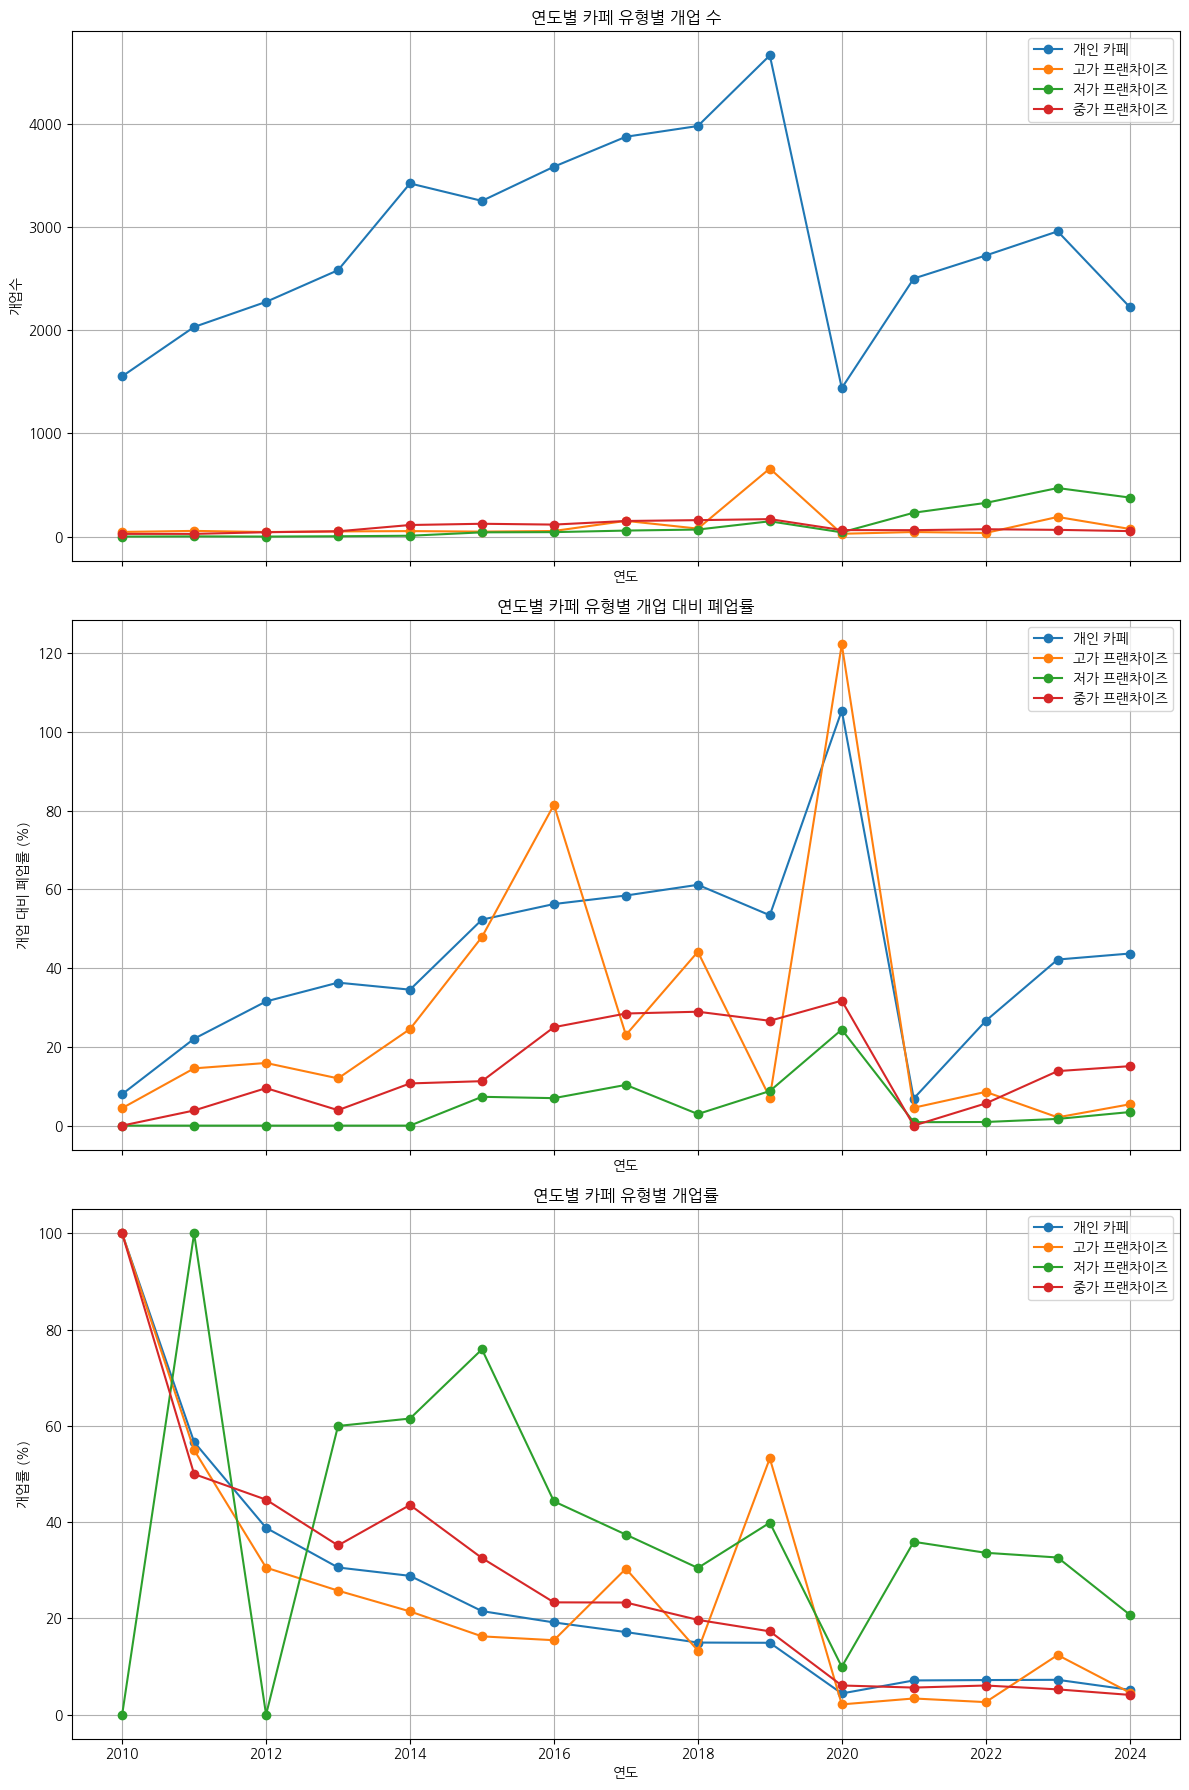

In [177]:
# Re-running the calculation and visualization steps from scratch to ensure data is available

# Re-calculating yearly opened and closed cafés by type
if '카페유형' in data.columns:
    # Calculating yearly opened and closed cafés by type
    yearly_opened_by_type = data.groupby(['카페유형', '영업연도']).size()
    yearly_closed_by_type = data.groupby(['카페유형', '폐업연도']).size()

    # Calculating cumulative opened cafés by type for each year
    cumulative_opened_by_type = yearly_opened_by_type.groupby(level=0).cumsum()
    cumulative_operating_by_type = cumulative_opened_by_type - yearly_closed_by_type.groupby(level=0).cumsum().fillna(0)

    # Calculating closure rate relative to openings by type
    closure_rate_relative_to_openings_by_type = (yearly_closed_by_type / yearly_opened_by_type) * 100
    closure_rate_relative_to_openings_by_type = closure_rate_relative_to_openings_by_type.fillna(0)

    # Compiling the data into a DataFrame for each type
    eda_results_by_type_extended = pd.DataFrame({
        '개업수': yearly_opened_by_type,
        '폐업수': yearly_closed_by_type,
        '개업 대비 폐업률 (%)': closure_rate_relative_to_openings_by_type,
        '개업률 (%)': opening_rate_by_type
    }).fillna(0)

    # Proceed with plotting after ensuring data is properly defined
    cafe_types = eda_results_by_type_extended.index.get_level_values(0).unique()

    # Creating separate plots for each metric by café type
    fig, axes = plt.subplots(3, 1, figsize=(12, 18), sharex=True)

    for cafe_type in cafe_types:
        # Filtering data for each café type
        cafe_data = eda_results_by_type_extended.loc[cafe_type]

        # Plot for 개업수 (Number of Openings)
        axes[0].plot(cafe_data.index, cafe_data['개업수'], marker='o', label=f'{cafe_type}')
        axes[0].set_ylabel('개업수')
        axes[0].set_title('연도별 카페 유형별 개업 수')

        # Plot for 개업 대비 폐업률 (Closure Rate Relative to Openings)
        axes[1].plot(cafe_data.index, cafe_data['개업 대비 폐업률 (%)'], marker='o', label=f'{cafe_type}')
        axes[1].set_ylabel('개업 대비 폐업률 (%)')
        axes[1].set_title('연도별 카페 유형별 개업 대비 폐업률')

        # Plot for 개업률 (Opening Rate)
        axes[2].plot(cafe_data.index, cafe_data['개업률 (%)'], marker='o', label=f'{cafe_type}')
        axes[2].set_ylabel('개업률 (%)')
        axes[2].set_title('연도별 카페 유형별 개업률')

    # Adding legend and labels
    for ax in axes:
        ax.legend()
        ax.grid(True)
        ax.set_xlabel('연도')

    plt.tight_layout()
    plt.show()
else:
    print("Column '카페 유형' not found in data.")

## 프차만

C:\Users\foma\AppData\Local\Temp\ipykernel_10624\1150714453.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  yearly_opened_franchise = franchise_data.groupby(['카페유형', '영업연도']).size()
C:\Users\foma\AppData\Local\Temp\ipykernel_10624\1150714453.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  yearly_closed_franchise = franchise_data.groupby(['카페유형', '폐업연도']).size()
C:\Users\foma\AppData\Local\Temp\ipykernel_10624\1150714453.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=T

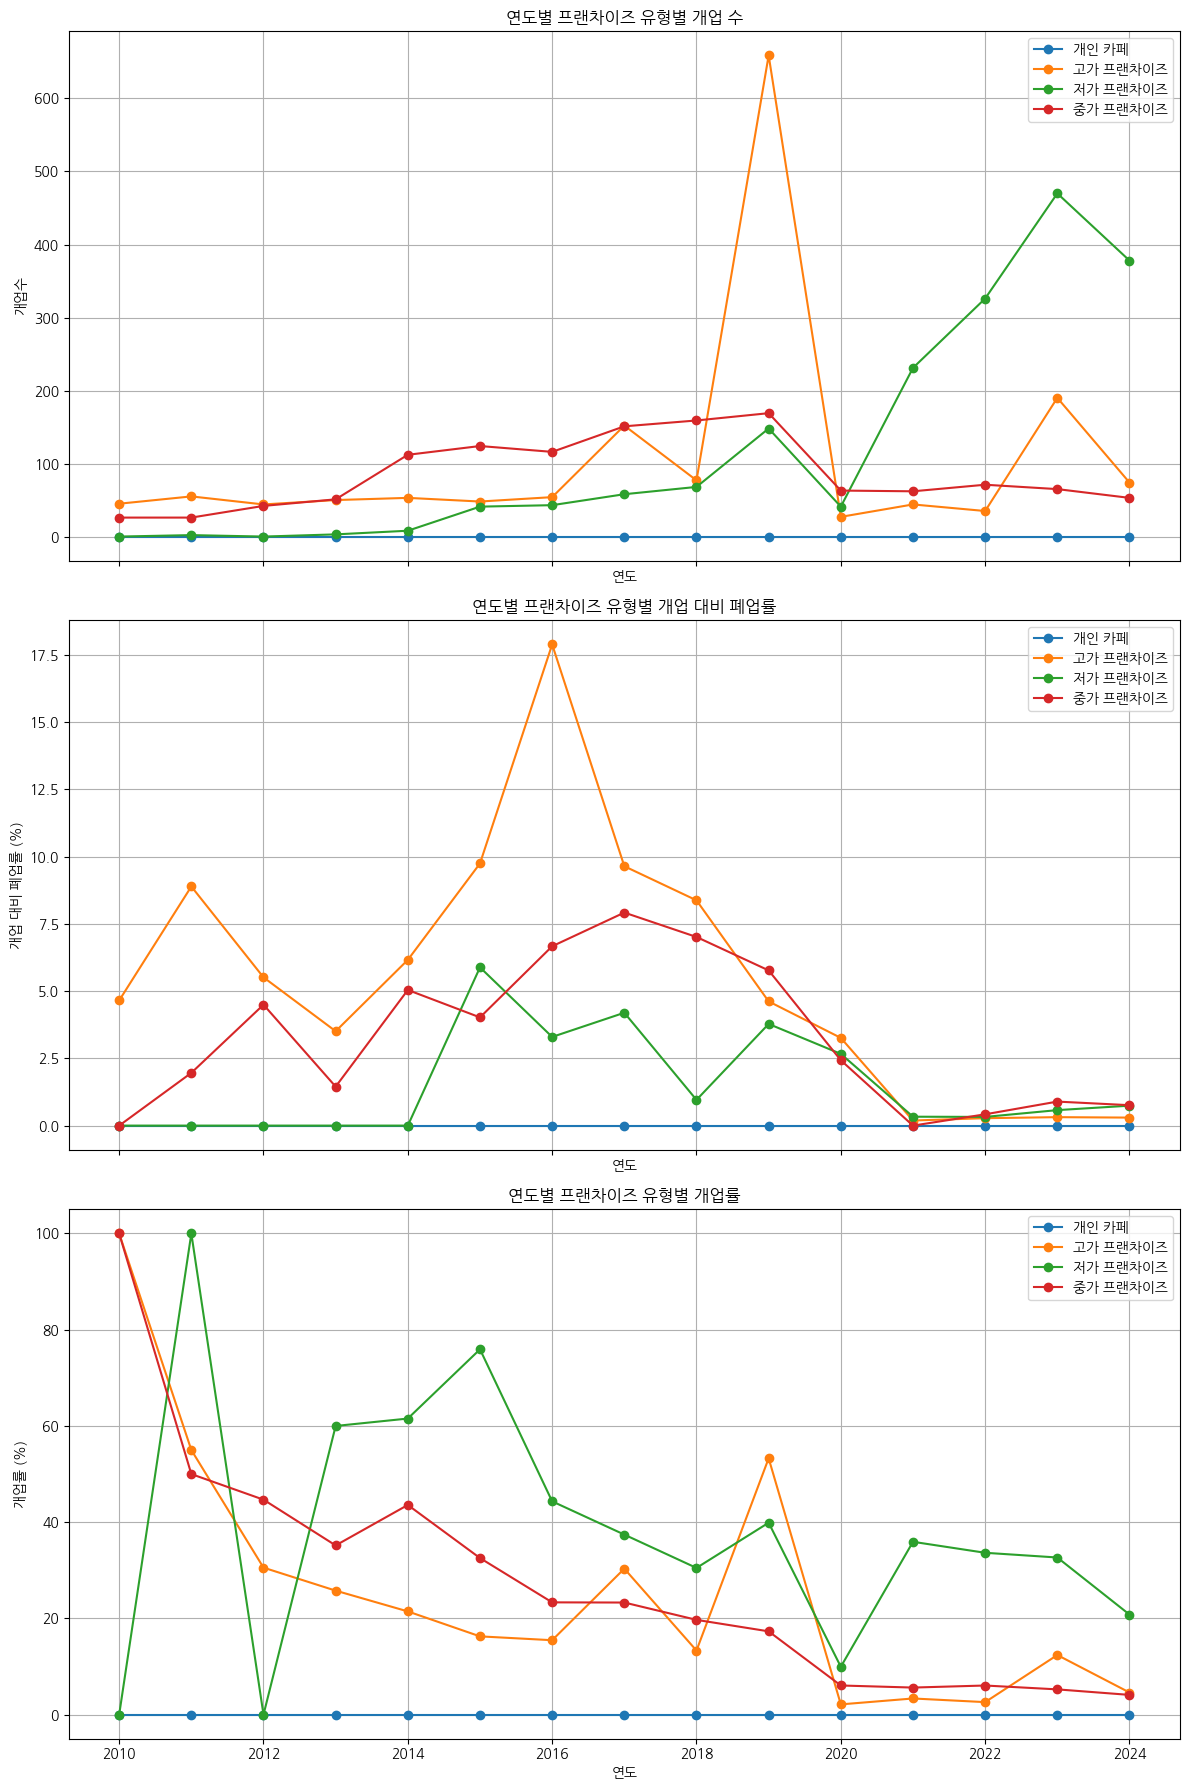

In [178]:
# Filtering the data to exclude '개인카페' and include only franchise types
franchise_data = data[data['카페유형'].isin(['중가 프랜차이즈', '저가 프랜차이즈', '고가 프랜차이즈'])]

# Calculating yearly opened and closed cafés for franchise types
yearly_opened_franchise = franchise_data.groupby(['카페유형', '영업연도']).size()
yearly_closed_franchise = franchise_data.groupby(['카페유형', '폐업연도']).size()

# Calculating cumulative opened cafés by franchise types for each year
cumulative_opened_franchise = yearly_opened_franchise.groupby(level=0).cumsum()
cumulative_operating_franchise = cumulative_opened_franchise - yearly_closed_franchise.groupby(level=0).cumsum().fillna(0)

# Calculating closure rate relative to openings and opening rate by franchise types
closure_rate_franchise = (yearly_closed_franchise / cumulative_operating_franchise) * 100
opening_rate_franchise = (yearly_opened_franchise / cumulative_opened_franchise) * 100

# Compiling the data into a DataFrame for each franchise type
franchise_eda_results = pd.DataFrame({
    '개업수': yearly_opened_franchise,
    '폐업수': yearly_closed_franchise,
    '개업 대비 폐업률 (%)': closure_rate_franchise,
    '개업률 (%)': opening_rate_franchise
}).fillna(0)

# Unique franchise types
franchise_types = franchise_eda_results.index.get_level_values(0).unique()

# Creating separate plots for each metric by franchise type
fig, axes = plt.subplots(3, 1, figsize=(12, 18), sharex=True)

for franchise_type in franchise_types:
    # Filtering data for each franchise type
    franchise_data_by_type = franchise_eda_results.loc[franchise_type]

    # Plot for 개업수 (Number of Openings)
    axes[0].plot(franchise_data_by_type.index, franchise_data_by_type['개업수'], marker='o', label=f'{franchise_type}')
    axes[0].set_ylabel('개업수')
    axes[0].set_title('연도별 프랜차이즈 유형별 개업 수')

    # Plot for 개업 대비 폐업률 (Closure Rate Relative to Openings)
    axes[1].plot(franchise_data_by_type.index, franchise_data_by_type['개업 대비 폐업률 (%)'], marker='o', label=f'{franchise_type}')
    axes[1].set_ylabel('개업 대비 폐업률 (%)')
    axes[1].set_title('연도별 프랜차이즈 유형별 개업 대비 폐업률')

    # Plot for 개업률 (Opening Rate)
    axes[2].plot(franchise_data_by_type.index, franchise_data_by_type['개업률 (%)'], marker='o', label=f'{franchise_type}')
    axes[2].set_ylabel('개업률 (%)')
    axes[2].set_title('연도별 프랜차이즈 유형별 개업률')

# Adding legend and labels
for ax in axes:
    ax.legend()
    ax.grid(True)
    ax.set_xlabel('연도')

plt.tight_layout()
plt.show()


## 개업 대비 폐업률

In [179]:
# Calculating the overall closure rate relative to openings each year
# Closure rate relative to openings is defined as (number of closures in a year / number of openings in that year) * 100

# Filtering out years with zero openings to avoid division by zero
closure_rate_relative_to_openings = (yearly_closed / yearly_opened) * 100

# Converting NaN values to 0 for years without closures or openings
closure_rate_relative_to_openings = closure_rate_relative_to_openings.fillna(0)

# Creating a DataFrame for display
closure_rate_relative_results = pd.DataFrame({
    '개업수': yearly_opened,
    '폐업수': yearly_closed,
    '개업 대비 폐업률 (%)': closure_rate_relative_to_openings
})

In [180]:
closure_rate_relative_results 

,개업수,폐업수,개업 대비 폐업률 (%)
2010,1623,126,7.763401
2011,2113,457,21.628017
2012,2359,728,30.860534
2013,2684,945,35.208644
2014,3593,1206,33.565266
2015,3464,1741,50.259815
2016,3795,2092,55.125165
2017,4233,2347,55.445311
2018,4280,2514,58.738318
2019,5636,2595,46.043293


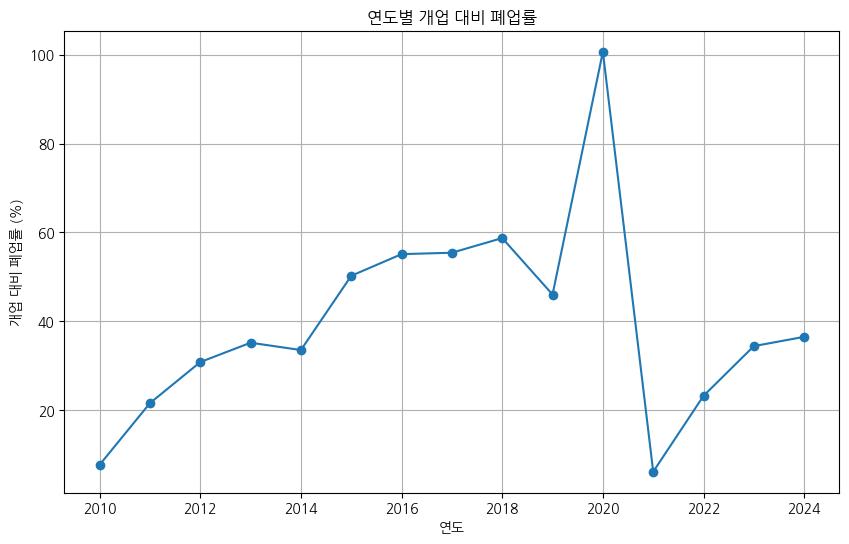

In [181]:
plt.figure(figsize=(10, 6))
plt.plot(closure_rate_relative_results.index, closure_rate_relative_results['개업 대비 폐업률 (%)'], marker='o')
plt.xlabel('연도')
plt.ylabel('개업 대비 폐업률 (%)')
plt.title('연도별 개업 대비 폐업률')
plt.grid(True)
plt.show()

# 연도별 영업중인 카페 수

In [182]:
# Adjusting the calculation to account for missing values in '폐업일자' (still operating cafés as of 2024-09-28)
# Setting '폐업일자' to 2024-09-28 for entries with NaN, indicating they are still operating as of that date
data['폐업일자'].fillna(pd.to_datetime('2024-09-28'), inplace=True)

# Recalculating yearly opened and closed cafés, treating '폐업일자' NaNs as still operating
data['영업연도'] = data['영업자시작일'].dt.year
data['폐업연도'] = data['폐업일자'].dt.year

# Calculate yearly opened and closed cafés
yearly_opened = data.groupby('영업연도').size()
yearly_closed = data.groupby('폐업연도').size()

# Cumulative sum of openings and closures over the years
cumulative_opened = yearly_opened.cumsum()
cumulative_closed = yearly_closed.cumsum()

# Calculating the number of operating cafés each year
operating_cafes_by_year = cumulative_opened - cumulative_closed
operating_cafes_by_year = operating_cafes_by_year[operating_cafes_by_year.index <= 2024]  # Limit to years up to 2024

# Converting the result to a DataFrame for display
operating_cafes_df = pd.DataFrame({
    '연도': operating_cafes_by_year.index,
    '영업 중인 카페 수': operating_cafes_by_year.values
})

C:\Users\foma\AppData\Local\Temp\ipykernel_10624\705633686.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['폐업일자'].fillna(pd.to_datetime('2024-09-28'), inplace=True)


In [183]:
# Calculating the number of cafés that are still operating as of 2024-09-28 specifically

# Counting cafés that have no '폐업일자' or are marked as operating up to 2024-09-28
still_operating_in_2024 = data[data['폐업일자'] == pd.to_datetime('2024-09-28')].shape[0]

# Displaying the result
still_operating_in_2024

operating_cafes_df['영업 중인 카페 수'].loc[14] = still_operating_in_2024

C:\Users\foma\AppData\Local\Temp\ipykernel_10624\3438171614.py:9: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  operating_cafes_df['영업 중인 카페 수'].loc[14] = still_operating_in_2024
C:\Users\foma\AppData\Local\Temp\ipykernel_10624\3438171614.py

In [241]:
still_operating_in_2024

28244

In [184]:
operating_cafes_df

,연도,영업 중인 카페 수
0,2010,1497
1,2011,3153
2,2012,4784
3,2013,6523
4,2014,8910
5,2015,10633
6,2016,12336
7,2017,14222
8,2018,15988
9,2019,19029


## 개업률 폐업률

In [185]:
operating_cafes_df #

,연도,영업 중인 카페 수
0,2010,1497
1,2011,3153
2,2012,4784
3,2013,6523
4,2014,8910
5,2015,10633
6,2016,12336
7,2017,14222
8,2018,15988
9,2019,19029


In [186]:
operating_cafes_df.set_index('연도', inplace=True)

In [187]:
operating_cafes_df

,영업 중인 카페 수
연도,
2010,1497
2011,3153
2012,4784
2013,6523
2014,8910
2015,10633
2016,12336
2017,14222
2018,15988


In [188]:
eda_results #

,개업수,폐업수,폐업률 (%),개업률 (%)
2010,1623,126,8.416834,100.000000
2011,2113,457,14.494133,56.557816
2012,2359,728,15.217391,38.703856
2013,2684,945,14.487199,30.572958
2014,3593,1206,13.535354,29.041384
2015,3464,1741,16.373554,21.874211
2016,3795,2092,16.958495,19.331669
2017,4233,2347,16.502602,17.738015
2018,4280,2514,15.724293,15.207504
2019,5636,2595,13.637080,16.684429


In [189]:
eda_results_by_type

개업수   폐업수    폐업률 (%)     개업률 (%)
카페유형                                            
개인 카페    2010  1552   124   8.683473  100.000000
         2011  2030   448  14.883721   56.672250
         2012  2273   717  15.703022   38.821520
         2013  2580   937  15.090997   30.586841
         2014  3420  1181  13.979640   28.848587
         2015  3251  1701  17.013403   21.521250
         2016  3582  2016  17.433414   19.167380
         2017  3872  2263  17.179078   17.163121
         2018  3976  2432  16.525107   14.983419
         2019  4660  2490  14.745070   14.937813
         2020  1438  1516   9.018978    4.406447
         2021  2499   172   0.898829    7.112971
         2022  2722   724   3.425759    7.190596
         2023  2956  1247   5.459003    7.243145
         2024  2224   972   4.034032    5.167887
고가 프랜차이즈 2010    45     2   4.651163  100.000000
         2011    55     8   8.888889   55.000000
         2012    44     7   5.511811   30.555556
         2013    50     6   3.508772   25.773196
         2014    53    13   6.161137   21.457490
         2015    48    23   9.745763   16.271186
         2016    54    44  17.886179   15.472779
         2017   152    35   9.641873   30.339321
         2018    77    34   8.374384   13.321799
         2019   659    47   4.616896   53.274050
         2020    27    33   3.260870    2.136076
         2021    44     2   0.189753    3.363914
         2022    35     3   0.276243    2.606106
         2023   190     4   0.314465   12.393999
         2024    74     4   0.298063    4.604854
저가 프랜차이즈 2010     0     0   0.000000    0.000000
         2011     2     0   0.000000  100.000000
         2012     0     0   0.000000    0.000000
         2013     3     0   0.000000   60.000000
         2014     8     0   0.000000   61.538462
         2015    41     3   5.882353   75.925926
         2016    43     3   3.296703   44.329897
         2017    58     6   4.195804   37.419355
         2018    68     2   0.956938   30.493274
         2019   148    13   3.779070   39.892183
         2020    41    10   2.666667    9.951456
         2021   231     2   0.331126   35.925350
         2022   326     3   0.323625   33.642931
         2023   470     8   0.575954   32.661571
         2024   378    13   0.741163   20.803522
중가 프랜차이즈 2010    26     0   0.000000  100.000000
         2011    26     1   1.960784   50.000000
         2012    42     4   4.494382   44.680851
         2013    51     2   1.449275   35.172414
         2014   112    12   5.042017   43.579767
         2015   124    14   4.022989   32.545932
         2016   116    29   6.666667   23.340040
         2017   151    43   7.918969   23.302469
         2018   159    46   7.012195   19.702602
         2019   169    45   5.769231   17.315574
         2020    63    20   2.430134    6.063523
         2021    62     0   0.000000    5.631244
         2022    71     4   0.420168    6.058020
         2023    65     9   0.892857    5.254648
         2024    53     8   0.759734    4.108527

In [190]:
eda_results_by_type_extended

개업수   폐업수  개업 대비 폐업률 (%)     개업률 (%)
카페유형                                                
개인 카페    2010  1552   124       7.989691  100.000000
         2011  2030   448      22.068966   56.672250
         2012  2273   717      31.544215   38.821520
         2013  2580   937      36.317829   30.586841
         2014  3420  1181      34.532164   28.848587
         2015  3251  1701      52.322362   21.521250
         2016  3582  2016      56.281407   19.167380
         2017  3872  2263      58.445248   17.163121
         2018  3976  2432      61.167002   14.983419
         2019  4660  2490      53.433476   14.937813
         2020  1438  1516     105.424200    4.406447
         2021  2499   172       6.882753    7.112971
         2022  2722   724      26.598090    7.190596
         2023  2956  1247      42.185386    7.243145
         2024  2224   972      43.705036    5.167887
고가 프랜차이즈 2010    45     2       4.444444  100.000000
         2011    55     8      14.545455   55.000000
         2012    44     7      15.909091   30.555556
         2013    50     6      12.000000   25.773196
         2014    53    13      24.528302   21.457490
         2015    48    23      47.916667   16.271186
         2016    54    44      81.481481   15.472779
         2017   152    35      23.026316   30.339321
         2018    77    34      44.155844   13.321799
         2019   659    47       7.132018   53.274050
         2020    27    33     122.222222    2.136076
         2021    44     2       4.545455    3.363914
         2022    35     3       8.571429    2.606106
         2023   190     4       2.105263   12.393999
         2024    74     4       5.405405    4.604854
저가 프랜차이즈 2010     0     0       0.000000    0.000000
         2011     2     0       0.000000  100.000000
         2012     0     0       0.000000    0.000000
         2013     3     0       0.000000   60.000000
         2014     8     0       0.000000   61.538462
         2015    41     3       7.317073   75.925926
         2016    43     3       6.976744   44.329897
         2017    58     6      10.344828   37.419355
         2018    68     2       2.941176   30.493274
         2019   148    13       8.783784   39.892183
         2020    41    10      24.390244    9.951456
         2021   231     2       0.865801   35.925350
         2022   326     3       0.920245   33.642931
         2023   470     8       1.702128   32.661571
         2024   378    13       3.439153   20.803522
중가 프랜차이즈 2010    26     0       0.000000  100.000000
         2011    26     1       3.846154   50.000000
         2012    42     4       9.523810   44.680851
         2013    51     2       3.921569   35.172414
         2014   112    12      10.714286   43.579767
         2015   124    14      11.290323   32.545932
         2016   116    29      25.000000   23.340040
         2017   151    43      28.476821   23.302469
         2018   159    46      28.930818   19.702602
         2019   169    45      26.627219   17.315574
         2020    63    20      31.746032    6.063523
         2021    62     0       0.000000    5.631244
         2022    71     4       5.633803    6.058020
         2023    65     9      13.846154    5.254648
         2024    53     8      15.094340    4.108527

In [191]:
closure_rate_relative_results

,개업수,폐업수,개업 대비 폐업률 (%)
2010,1623,126,7.763401
2011,2113,457,21.628017
2012,2359,728,30.860534
2013,2684,945,35.208644
2014,3593,1206,33.565266
2015,3464,1741,50.259815
2016,3795,2092,55.125165
2017,4233,2347,55.445311
2018,4280,2514,58.738318
2019,5636,2595,46.043293


In [192]:
a = pd.concat( [operating_cafes_df, eda_results,closure_rate_relative_results],axis=1)

In [193]:
a

,영업 중인 카페 수,개업수,폐업수,폐업률 (%),개업률 (%),개업수,폐업수,개업 대비 폐업률 (%)
2010,1497,1623,126,8.416834,100.000000,1623,126,7.763401
2011,3153,2113,457,14.494133,56.557816,2113,457,21.628017
2012,4784,2359,728,15.217391,38.703856,2359,728,30.860534
2013,6523,2684,945,14.487199,30.572958,2684,945,35.208644
2014,8910,3593,1206,13.535354,29.041384,3593,1206,33.565266
2015,10633,3464,1741,16.373554,21.874211,3464,1741,50.259815
2016,12336,3795,2092,16.958495,19.331669,3795,2092,55.125165
2017,14222,4233,2347,16.502602,17.738015,4233,2347,55.445311
2018,15988,4280,2514,15.724293,15.207504,4280,2514,58.738318
2019,19029,5636,2595,13.637080,16.684429,5636,2595,46.043293


In [194]:
a.columns = ['영업 중인 카페 수(누적)', '신규 개업수', '폐업수', '폐업률(%)(폐업수/영업 중인 카페 수)', '개업률(%)(개업수/영업 중인 카페 수)', '개업수1', '폐업수1','개업 대비 폐업률(%) (폐업/신규 개업)']

In [195]:
aa = a.drop(columns=['개업수1',	'폐업수1'], axis = 1)

In [196]:
aa # 매해 연말 기준 (2024년만 9얼28일 기준) 

,영업 중인 카페 수(누적),신규 개업수,폐업수,폐업률(%)(폐업수/영업 중인 카페 수),개업률(%)(개업수/영업 중인 카페 수),개업 대비 폐업률(%) (폐업/신규 개업)
2010,1497,1623,126,8.416834,100.000000,7.763401
2011,3153,2113,457,14.494133,56.557816,21.628017
2012,4784,2359,728,15.217391,38.703856,30.860534
2013,6523,2684,945,14.487199,30.572958,35.208644
2014,8910,3593,1206,13.535354,29.041384,33.565266
2015,10633,3464,1741,16.373554,21.874211,50.259815
2016,12336,3795,2092,16.958495,19.331669,55.125165
2017,14222,4233,2347,16.502602,17.738015,55.445311
2018,15988,4280,2514,15.724293,15.207504,58.738318
2019,19029,5636,2595,13.637080,16.684429,46.043293


In [197]:
aa['개업률(수정)'] = (aa['신규 개업수'] / aa['영업 중인 카페 수(누적)'].shift(1)) * 100

# Filling NaN for the first year as there is no previous data
aa['개업률(수정)'].fillna(0, inplace=True)


C:\Users\foma\AppData\Local\Temp\ipykernel_10624\3512010939.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  aa['개업률(수정)'].fillna(0, inplace=True)


In [198]:
aa

,영업 중인 카페 수(누적),신규 개업수,폐업수,폐업률(%)(폐업수/영업 중인 카페 수),개업률(%)(개업수/영업 중인 카페 수),개업 대비 폐업률(%) (폐업/신규 개업),개업률(수정)
2010,1497,1623,126,8.416834,100.000000,7.763401,0.000000
2011,3153,2113,457,14.494133,56.557816,21.628017,141.148965
2012,4784,2359,728,15.217391,38.703856,30.860534,74.817634
2013,6523,2684,945,14.487199,30.572958,35.208644,56.103679
2014,8910,3593,1206,13.535354,29.041384,33.565266,55.082017
2015,10633,3464,1741,16.373554,21.874211,50.259815,38.877666
2016,12336,3795,2092,16.958495,19.331669,55.125165,35.690774
2017,14222,4233,2347,16.502602,17.738015,55.445311,34.314202
2018,15988,4280,2514,15.724293,15.207504,58.738318,30.094220
2019,19029,5636,2595,13.637080,16.684429,46.043293,35.251439


In [199]:
bb = aa.drop(columns = ['개업률(%)(개업수/영업 중인 카페 수)'])

In [200]:
bb.columns = ['영업 중인 카페 수(누적)', '신규 개업수', '폐업수', '폐업률(%)(폐업수/영업 중인 카페 수)',
       '개업 대비 폐업률(%) (폐업/신규 개업)', '개업률(신규 개업 수 / 이전 연도 누적 영업 카페 수)']

In [201]:
bb

,영업 중인 카페 수(누적),신규 개업수,폐업수,폐업률(%)(폐업수/영업 중인 카페 수),개업 대비 폐업률(%) (폐업/신규 개업),개업률(신규 개업 수 / 이전 연도 누적 영업 카페 수)
2010,1497,1623,126,8.416834,7.763401,0.000000
2011,3153,2113,457,14.494133,21.628017,141.148965
2012,4784,2359,728,15.217391,30.860534,74.817634
2013,6523,2684,945,14.487199,35.208644,56.103679
2014,8910,3593,1206,13.535354,33.565266,55.082017
2015,10633,3464,1741,16.373554,50.259815,38.877666
2016,12336,3795,2092,16.958495,55.125165,35.690774
2017,14222,4233,2347,16.502602,55.445311,34.314202
2018,15988,4280,2514,15.724293,58.738318,30.094220
2019,19029,5636,2595,13.637080,46.043293,35.251439


In [202]:
bb.loc[2024, '폐업수'] = 997

In [203]:
bb.loc[2024]['폐업수']

997.0

In [204]:
bb.loc[2024, '폐업률(%)(폐업수/영업 중인 카페 수)'] = 3.53

In [205]:
bb

,영업 중인 카페 수(누적),신규 개업수,폐업수,폐업률(%)(폐업수/영업 중인 카페 수),개업 대비 폐업률(%) (폐업/신규 개업),개업률(신규 개업 수 / 이전 연도 누적 영업 카페 수)
2010,1497,1623,126,8.416834,7.763401,0.000000
2011,3153,2113,457,14.494133,21.628017,141.148965
2012,4784,2359,728,15.217391,30.860534,74.817634
2013,6523,2684,945,14.487199,35.208644,56.103679
2014,8910,3593,1206,13.535354,33.565266,55.082017
2015,10633,3464,1741,16.373554,50.259815,38.877666
2016,12336,3795,2092,16.958495,55.125165,35.690774
2017,14222,4233,2347,16.502602,55.445311,34.314202
2018,15988,4280,2514,15.724293,58.738318,30.094220
2019,19029,5636,2595,13.637080,46.043293,35.251439


In [206]:
bb['폐업률(%)(폐업수/이전 연도 누적 영업 카페 수))'] = (bb['폐업수'] / bb['영업 중인 카페 수(누적)'].shift(1)) * 100

In [207]:
bb['개업 점포 비율(%)(신규 개업/영업중인 카페 수)'] = (bb['신규 개업수'] / bb['영업 중인 카페 수(누적)'] ) * 100


In [211]:
bb

,영업 중인 카페 수(누적),신규 개업수,폐업수,개업 대비 폐업률(%) (폐업/신규 개업),개업률(신규 개업 수 / 이전 연도 누적 영업 카페 수),폐업률(%)(폐업수/이전 연도 누적 영업 카페 수))
2010,1497,1623,126,7.763401,0.000000,NaN
2011,3153,2113,457,21.628017,141.148965,30.527722
2012,4784,2359,728,30.860534,74.817634,23.089121
2013,6523,2684,945,35.208644,56.103679,19.753344
2014,8910,3593,1206,33.565266,55.082017,18.488426
2015,10633,3464,1741,50.259815,38.877666,19.539843
2016,12336,3795,2092,55.125165,35.690774,19.674598
2017,14222,4233,2347,55.445311,34.314202,19.025616
2018,15988,4280,2514,58.738318,30.094220,17.676839
2019,19029,5636,2595,46.043293,35.251439,16.230923


In [212]:
bb = bb.drop(columns = '개업 점포 비율(%)(신규 개업/영업중인 카페 수)')

KeyError: "['개업 점포 비율(%)(신규 개업/영업중인 카페 수)'] not found in axis"

In [210]:
bb = bb.drop(columns = '폐업률(%)(폐업수/영업 중인 카페 수)')

In [213]:
bb.to_csv("연도별 카페 현황.csv",index = True)

In [ ]:
bb

In [ ]:
# 연도별 카페 현황

In [9]:
cc = pd.read_csv("./연도별 카페 현황.csv",index_col=0, encoding ='cp949' )

In [340]:
cc

,영업 중인 카페 수(누적),신규 개업수,폐업수,개업 대비 폐업률(%) (폐업/신규 개업),개업률(신규 개업 수 / 이전 연도 누적 영업 카페 수),폐업률(%)(폐업수/이전 연도 누적 영업 카페 수))
2010,1497,1623,126,7.763401,NaN,NaN
2011,3153,2113,457,21.628017,141.148965,30.527722
2012,4784,2359,728,30.860534,74.817634,23.089121
2013,6523,2684,945,35.208644,56.103679,19.753344
2014,8910,3593,1206,33.565266,55.082017,18.488426
2015,10633,3464,1741,50.259815,38.877666,19.539843
2016,12336,3795,2092,55.125165,35.690774,19.674598
2017,14222,4233,2347,55.445311,34.314202,19.025616
2018,15988,4280,2514,58.738318,30.094220,17.676839
2019,19029,5636,2595,46.043293,35.251439,16.230923


In [10]:
data = cc.copy()

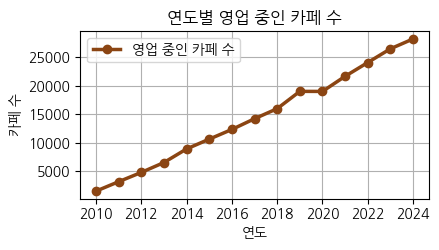

In [350]:
# Plotting various time series visualizations in a brown color palette
plt.figure(figsize=(4.5,10))

# Define a color scheme for brown tones
colors = ['#8B4513', '#A0522D', '#D2691E', '#CD853F', '#F4A460']
line_width = 2.5

# Plot 1: 영업 중인 카페 수 (Operating Cafes)
plt.subplot(4, 1, 1)
plt.plot(data.index, data['영업 중인 카페 수(누적)'], color=colors[0], marker='o', label='영업 중인 카페 수',linewidth=line_width)
plt.title('연도별 영업 중인 카페 수')
plt.xlabel('연도')
plt.ylabel('카페 수')
plt.grid(True)
plt.legend()

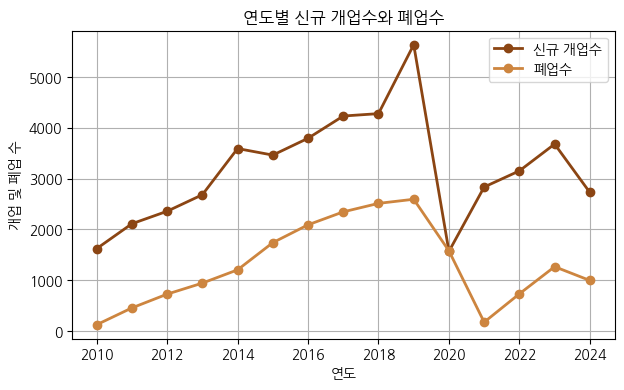

In [17]:
import matplotlib.pyplot as plt

# 색상 및 선 굵기 설정
colors = ['#8B4513', '#CD853F']
line_width = 2

# 하나의 그림에 신규 개업수와 폐업수를 겹쳐서 그리기
plt.figure(figsize=(7, 4))

# 신규 개업수 그래프
plt.plot(data.index, data['신규 개업수'], color=colors[0], marker='o', label='신규 개업수', linewidth=line_width)

# 폐업수 그래프
plt.plot(data.index, data['폐업수'], color=colors[1], marker='o', label='폐업수', linewidth=line_width)

# 그래프 설정
plt.title('연도별 신규 개업수와 폐업수')
plt.xlabel('연도')
plt.ylabel('개업 및 폐업 수')
plt.grid(True)
plt.legend()

# 그래프 표시
plt.show()


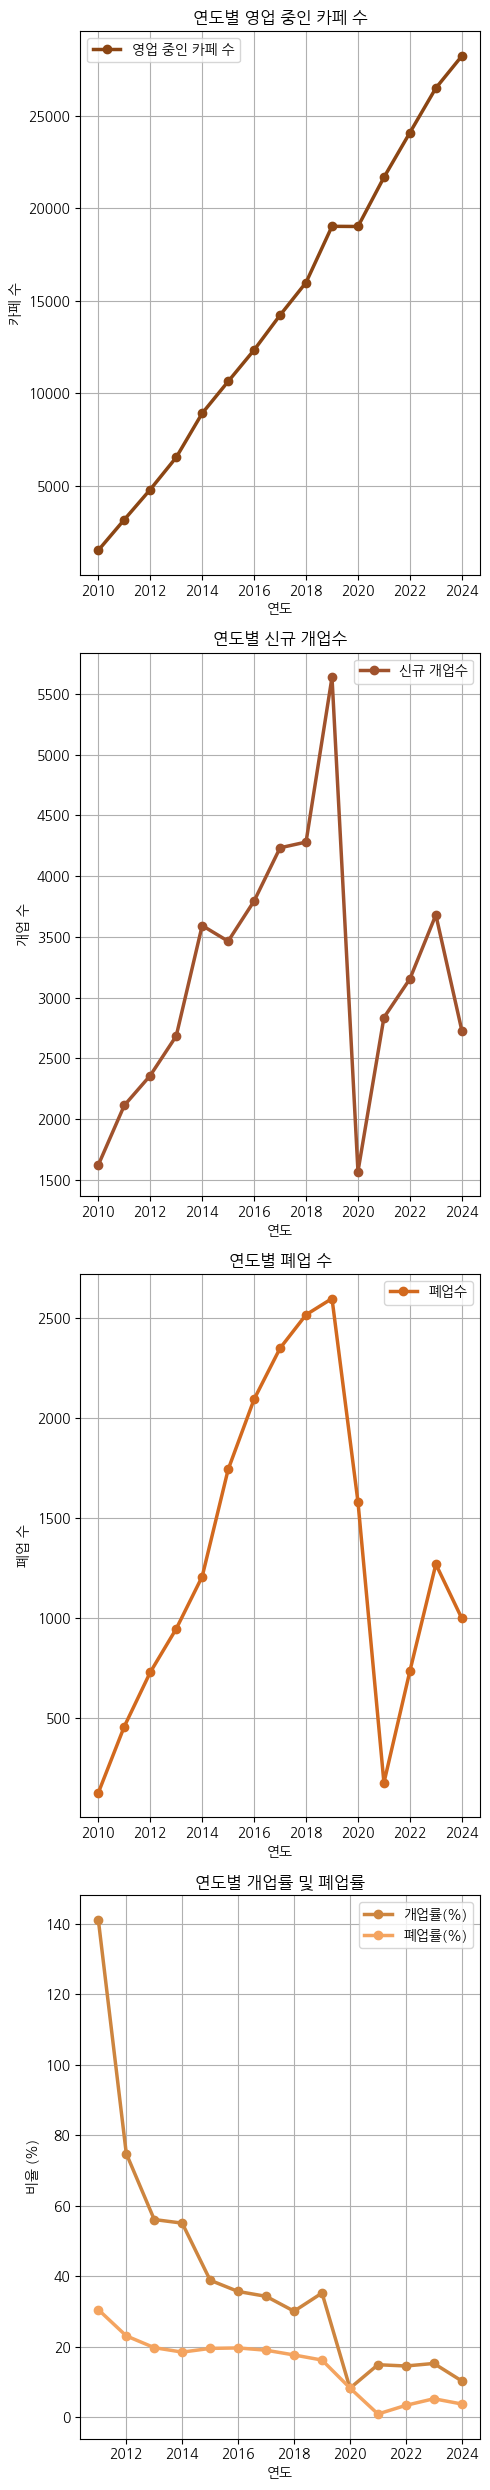

In [341]:
# Plotting various time series visualizations in a brown color palette
plt.figure(figsize=(5, 25))

# Define a color scheme for brown tones
colors = ['#8B4513', '#A0522D', '#D2691E', '#CD853F', '#F4A460']
line_width = 2.5

# Plot 1: 영업 중인 카페 수 (Operating Cafes)
plt.subplot(4, 1, 1)
plt.plot(data.index, data['영업 중인 카페 수(누적)'], color=colors[0], marker='o', label='영업 중인 카페 수',linewidth=line_width)
plt.title('연도별 영업 중인 카페 수')
plt.xlabel('연도')
plt.ylabel('카페 수')
plt.grid(True)
plt.legend()

# Plot 2: 신규 개업수 (New Openings)
plt.subplot(4, 1, 2)
plt.plot(data.index, data['신규 개업수'], color=colors[1], marker='o', label='신규 개업수',linewidth=line_width)
plt.title('연도별 신규 개업수')
plt.xlabel('연도')
plt.ylabel('개업 수')
plt.grid(True)
plt.legend()

# Plot 3: 폐업수 (Closures)
plt.subplot(4, 1, 3)
plt.plot(data.index, data['폐업수'], color=colors[2], marker='o', label='폐업수',linewidth=line_width)
plt.title('연도별 폐업 수')
plt.xlabel('연도')
plt.ylabel('폐업 수')
plt.grid(True)
plt.legend()

# Plot 4: 개업률(%) (Opening Rate) and 폐업률(%) (Closure Rate)
plt.subplot(4, 1, 4)
plt.plot(data.index, data['개업률(신규 개업 수 / 이전 연도 누적 영업 카페 수)'], color=colors[3], marker='o', label='개업률(%)',linewidth=line_width)
plt.plot(data.index, data['폐업률(%)(폐업수/이전 연도 누적 영업 카페 수))'], color=colors[4], marker='o', label='폐업률(%)',linewidth=line_width)
plt.title('연도별 개업률 및 폐업률')
plt.xlabel('연도')
plt.ylabel('비율 (%)')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


# 연도별 프차(고,중,저)

In [235]:
data = real_data.copy()

In [243]:
# Ensuring '카페유형' column exists and filtering out '개인카페'
if '카페유형' in data.columns:
    # Handling missing values in '폐업일자' as 2024-09-28 to indicate still operating cafés
    data['폐업일자'].fillna(pd.to_datetime('2024-09-28'), inplace=True)

    # Filtering out '개인카페'
    franchise_data = data[data['카페유형'] != '개인카페']

    # Extracting years for analysis
    franchise_data['영업연도'] = franchise_data['영업자시작일'].dt.year
    franchise_data['폐업연도'] = franchise_data['폐업일자'].dt.year

    # Calculating yearly opened and closed counts by type
    yearly_opened_by_type = franchise_data.groupby(['카페유형', '영업연도']).size()
    yearly_closed_by_type = franchise_data.groupby(['카페유형', '폐업연도']).size()

    # Calculating cumulative counts for operating cafés by type each year
    cumulative_opened_by_type = yearly_opened_by_type.groupby(level=0).cumsum()
    cumulative_closed_by_type = yearly_closed_by_type.groupby(level=0).cumsum()
    operating_cafes_by_type = cumulative_opened_by_type - cumulative_closed_by_type

    # Compiling results into a DataFrame, unstacking for readability
    eda_results_by_type_extended = pd.DataFrame({
        '개업수': yearly_opened_by_type,
        '폐업수': yearly_closed_by_type,
        '영업 중인 카페 수': operating_cafes_by_type
    }).fillna(0).unstack(level=0)

else:
    eda_results_by_type_extended = None


C:\Users\foma\AppData\Local\Temp\ipykernel_10624\3372121208.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['폐업일자'].fillna(pd.to_datetime('2024-09-28'), inplace=True)
C:\Users\foma\AppData\Local\Temp\ipykernel_10624\3372121208.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  yearly_opened_by_type = franchise_data.groupby(['카페

In [244]:
eda_results_by_type_extended

개업수                               폐업수                             \
카페유형 개인 카페 고가 프랜차이즈 저가 프랜차이즈 중가 프랜차이즈  개인 카페 고가 프랜차이즈 저가 프랜차이즈 중가 프랜차이즈   
2010  1552       45        0       26    124        2        0        0   
2011  2030       55        2       26    448        8        0        1   
2012  2273       44        0       42    717        7        0        4   
2013  2580       50        3       51    937        6        0        2   
2014  3420       53        8      112   1181       13        0       12   
2015  3251       48       41      124   1701       23        3       14   
2016  3582       54       43      116   2016       44        3       29   
2017  3872      152       58      151   2263       35        6       43   
2018  3976       77       68      159   2432       34        2       46   
2019  4660      659      148      169   2490       47       13       45   
2020  1438       27       41       63   1516       33       10       20   
2021  2499       44      231       62    172        2        2        0   
2022  2722       35      326       71    724        3        3        4   
2023  2956      190      470       65   1247        4        8        9   
2024  2224       74      378       53  25067     1346     1767     1061   

     영업 중인 카페 수                             
카페유형      개인 카페 고가 프랜차이즈 저가 프랜차이즈 중가 프랜차이즈  
2010       1428       43        0       26  
2011       3010       90        2       51  
2012       4566      127        2       89  
2013       6209      171        5      138  
2014       8448      211       13      238  
2015       9998      236       51      348  
2016      11564      246       91      435  
2017      13173      363      143      543  
2018      14717      406      209      656  
2019      16887     1018      344      780  
2020      16809     1012      375      823  
2021      19136     1054      604      885  
2022      21134     1086      927      952  
2023      22843     1272     1389     1008  
2024          0        0        0        0

In [ ]:
eda_results_by_type_extended.to_csv('카페유형별 연도별 카페 현황.csv') #값 다시 확인

In [261]:
y = real_data[(real_data['폐업여부'] == 1)&(real_data['폐업연도'] == 2024)] #997

In [264]:
y['카페유형'].value_counts()

카페유형
개인 카페       972
저가 프랜차이즈     13
중가 프랜차이즈      8
고가 프랜차이즈      4
Name: count, dtype: int64

In [265]:
yy = pd.read_csv("카페유형별 연도별 카페 현황.csv", index_col=0, encoding ='cp949' )

In [266]:
yy

,개업수,개업수.1,개업수.2,개업수.3,폐업수,폐업수.1,폐업수.2,폐업수.3,영업 중인 카페 수,영업 중인 카페 수.1,영업 중인 카페 수.2,영업 중인 카페 수.3
카페유형,개인 카페,고가 프랜차이즈,저가 프랜차이즈,중가 프랜차이즈,개인 카페,고가 프랜차이즈,저가 프랜차이즈,중가 프랜차이즈,개인 카페,고가 프랜차이즈,저가 프랜차이즈,중가 프랜차이즈
2010,1552,45,0,26,124,2,0,0,1428,43,0,26
2011,2030,55,2,26,448,8,0,1,3010,90,2,51
2012,2273,44,0,42,717,7,0,4,4566,127,2,89
2013,2580,50,3,51,937,6,0,2,6209,171,5,138
2014,3420,53,8,112,1181,13,0,12,8448,211,13,238
2015,3251,48,41,124,1701,23,3,14,9998,236,51,348
2016,3582,54,43,116,2016,44,3,29,11564,246,91,435
2017,3872,152,58,151,2263,35,6,43,13173,363,143,543
2018,3976,77,68,159,2432,34,2,46,14717,406,209,656


In [283]:
data = pd.DataFrame({
    '연도': [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024],
    '개업수_개인 카페': [1552, 2030, 2273, 2580, 3420, 3251, 3582, 3872, 3976, 4660, 1438, 2499, 2722, 2956, 2224],
    '개업수_고가 프랜차이즈': [45, 55, 44, 50, 53, 48, 54, 152, 77, 659, 27, 44, 35, 190, 74],
    '개업수_저가 프랜차이즈': [0, 2, 0, 3, 8, 41, 43, 58, 68, 148, 41, 231, 326, 470, 378],
    '개업수_중가 프랜차이즈': [26, 26, 42, 51, 112, 124, 116, 151, 159, 169, 63, 62, 71, 65, 53],
    '폐업수_개인 카페': [124, 448, 717, 937, 1181, 1701, 2016, 2263, 2432, 2490, 1516, 172, 724, 1247, 972],
    '폐업수_고가 프랜차이즈': [2, 8, 7, 6, 13, 23, 44, 35, 34, 47, 33, 2, 3, 4, 4],
    '폐업수_저가 프랜차이즈': [0, 0, 0, 0, 0, 3, 3, 6, 2, 13, 10, 2, 3, 8, 13],
    '폐업수_중가 프랜차이즈': [0, 1, 4, 2, 12, 14, 29, 43, 46, 45, 20, 0, 4, 9, 8],
     '영업 중인 카페 수_개인 카페': [1428, 3010, 4566, 6209, 8448, 9998, 11564, 13173, 14717, 16887, 16809, 19136, 21134, 22843, 24095],
    '영업 중인 카페 수_고가 프랜차이즈': [43, 90, 127, 171, 211, 236, 246, 363, 406, 1018, 1012, 1054, 1086, 1272, 1342],
    '영업 중인 카페 수_저가 프랜차이즈': [0, 2, 2, 5, 13, 51, 91, 143, 209, 344, 375, 604, 927, 1389, 1754],
    '영업 중인 카페 수_중가 프랜차이즈': [26, 51, 89, 138, 238, 348, 435, 543, 656, 780, 823, 885, 952, 1008, 1053]
})

# Calculating 폐업수 / 개업수 for each type
ratios1 = pd.DataFrame({
    '연도': data['연도'],
    '개업대비폐업률_개인 카페 (%)': (data['폐업수_개인 카페'] / data['개업수_개인 카페']) * 100,
    '개업대비폐업률_고가 프랜차이즈 (%)': (data['폐업수_고가 프랜차이즈'] / data['개업수_고가 프랜차이즈']) * 100,
    '개업대비폐업률_저가 프랜차이즈 (%)': (data['폐업수_저가 프랜차이즈'] / data['개업수_저가 프랜차이즈'].replace(0, pd.NA)) * 100,
    '개업대비폐업률_중가 프랜차이즈 (%)': (data['폐업수_중가 프랜차이즈'] / data['개업수_중가 프랜차이즈']) * 100,
    '폐업률_개인 카페 (%)': (data['폐업수_개인 카페'] / data['영업 중인 카페 수_개인 카페'].shift(1)) * 100,
    '폐업률_고가 프랜차이즈 (%)': (data['폐업수_고가 프랜차이즈'] / data['영업 중인 카페 수_고가 프랜차이즈'].shift(1)) * 100,
    '폐업률_저가 프랜차이즈 (%)': (data['폐업수_저가 프랜차이즈'] / data['영업 중인 카페 수_저가 프랜차이즈'].shift(1)) * 100,
    '폐업률_중가 프랜차이즈 (%)': (data['폐업수_중가 프랜차이즈'] / data['영업 중인 카페 수_중가 프랜차이즈'].shift(1)) * 100,
    '개업률_개인 카페 (%)': (data['개업수_개인 카페'] / data['영업 중인 카페 수_개인 카페'].shift(1)) * 100,
    '개업률_고가 프랜차이즈 (%)': (data['개업수_고가 프랜차이즈'] / data['영업 중인 카페 수_고가 프랜차이즈'].shift(1)) * 100,
    '개업률_저가 프랜차이즈 (%)': (data['개업수_저가 프랜차이즈'] / data['영업 중인 카페 수_저가 프랜차이즈'].shift(1)) * 100,
    '개업률_중가 프랜차이즈 (%)': (data['개업수_중가 프랜차이즈'] / data['영업 중인 카페 수_중가 프랜차이즈'].shift(1)) * 100,
})

# Display the calculated closure rates
ratios1.set_index('연도', inplace=True)
ratios1.fillna(0, inplace=True)  # Handling division by zero by replacing NaN with 0



C:\Users\foma\AppData\Local\Temp\ipykernel_10624\4227041160.py:36: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ratios1.fillna(0, inplace=True)  # Handling division by zero by replacing NaN with 0


In [284]:
ratios1 = round(ratios1,3)

In [285]:
ratios1

,개업대비폐업률_개인 카페 (%),개업대비폐업률_고가 프랜차이즈 (%),개업대비폐업률_저가 프랜차이즈 (%),개업대비폐업률_중가 프랜차이즈 (%),폐업률_개인 카페 (%),폐업률_고가 프랜차이즈 (%),폐업률_저가 프랜차이즈 (%),폐업률_중가 프랜차이즈 (%),개업률_개인 카페 (%),개업률_고가 프랜차이즈 (%),개업률_저가 프랜차이즈 (%),개업률_중가 프랜차이즈 (%)
연도,,,,,,,,,,,,
2010,7.990,4.444,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2011,22.069,14.545,0.000,3.846,31.373,18.605,0.000,3.846,142.157,127.907,inf,100.000
2012,31.544,15.909,0.000,9.524,23.821,7.778,0.000,7.843,75.515,48.889,0.000,82.353
2013,36.318,12.000,0.000,3.922,20.521,4.724,0.000,2.247,56.505,39.370,150.000,57.303
2014,34.532,24.528,0.000,10.714,19.021,7.602,0.000,8.696,55.081,30.994,160.000,81.159
2015,52.322,47.917,7.317,11.290,20.135,10.900,23.077,5.882,38.482,22.749,315.385,52.101
2016,56.281,81.481,6.977,25.000,20.164,18.644,5.882,8.333,35.827,22.881,84.314,33.333
2017,58.445,23.026,10.345,28.477,19.569,14.228,6.593,9.885,33.483,61.789,63.736,34.713
2018,61.167,44.156,2.941,28.931,18.462,9.366,1.399,8.471,30.183,21.212,47.552,29.282


In [286]:
data = ratios1.copy()

In [290]:
closure_to_opening_ratio = data[[ '개업대비폐업률_개인 카페 (%)', '개업대비폐업률_고가 프랜차이즈 (%)', '개업대비폐업률_저가 프랜차이즈 (%)', '개업대비폐업률_중가 프랜차이즈 (%)']].copy()
closure_rate = data[[ '폐업률_개인 카페 (%)', '폐업률_고가 프랜차이즈 (%)', '폐업률_저가 프랜차이즈 (%)', '폐업률_중가 프랜차이즈 (%)']].copy()
opening_rate = data[['개업률_개인 카페 (%)', '개업률_고가 프랜차이즈 (%)', '개업률_저가 프랜차이즈 (%)', '개업률_중가 프랜차이즈 (%)']].copy()

In [291]:
closure_to_opening_ratio

,개업대비폐업률_개인 카페 (%),개업대비폐업률_고가 프랜차이즈 (%),개업대비폐업률_저가 프랜차이즈 (%),개업대비폐업률_중가 프랜차이즈 (%)
연도,,,,
2010,7.990,4.444,0.000,0.000
2011,22.069,14.545,0.000,3.846
2012,31.544,15.909,0.000,9.524
2013,36.318,12.000,0.000,3.922
2014,34.532,24.528,0.000,10.714
2015,52.322,47.917,7.317,11.290
2016,56.281,81.481,6.977,25.000
2017,58.445,23.026,10.345,28.477
2018,61.167,44.156,2.941,28.931


In [292]:
closure_rate

,폐업률_개인 카페 (%),폐업률_고가 프랜차이즈 (%),폐업률_저가 프랜차이즈 (%),폐업률_중가 프랜차이즈 (%)
연도,,,,
2010,0.000,0.000,0.000,0.000
2011,31.373,18.605,0.000,3.846
2012,23.821,7.778,0.000,7.843
2013,20.521,4.724,0.000,2.247
2014,19.021,7.602,0.000,8.696
2015,20.135,10.900,23.077,5.882
2016,20.164,18.644,5.882,8.333
2017,19.569,14.228,6.593,9.885
2018,18.462,9.366,1.399,8.471


In [293]:
opening_rate

,개업률_개인 카페 (%),개업률_고가 프랜차이즈 (%),개업률_저가 프랜차이즈 (%),개업률_중가 프랜차이즈 (%)
연도,,,,
2010,0.000,0.000,0.000,0.000
2011,142.157,127.907,inf,100.000
2012,75.515,48.889,0.000,82.353
2013,56.505,39.370,150.000,57.303
2014,55.081,30.994,160.000,81.159
2015,38.482,22.749,315.385,52.101
2016,35.827,22.881,84.314,33.333
2017,33.483,61.789,63.736,34.713
2018,30.183,21.212,47.552,29.282


In [296]:
data = yy.copy()

In [ ]:
# Splitting the data into three separate DataFrames based on column categories
opening_data = data[[ '개업수', '개업수.1', '개업수.2', '개업수.3']].copy()
closure_data = data[[ '폐업수', '폐업수.1', '폐업수.2', '폐업수.3']].copy()
operating_data = data[[ '영업 중인 카페 수','영업 중인 카페 수.1','영업 중인 카페 수.2','영업 중인 카페 수.3']].copy()


In [301]:
opening_data

,개업수,개업수.1,개업수.2,개업수.3
카페유형,개인 카페,고가 프랜차이즈,저가 프랜차이즈,중가 프랜차이즈
2010,1552,45,0,26
2011,2030,55,2,26
2012,2273,44,0,42
2013,2580,50,3,51
2014,3420,53,8,112
2015,3251,48,41,124
2016,3582,54,43,116
2017,3872,152,58,151
2018,3976,77,68,159


In [302]:
closure_data

,폐업수,폐업수.1,폐업수.2,폐업수.3
카페유형,개인 카페,고가 프랜차이즈,저가 프랜차이즈,중가 프랜차이즈
2010,124,2,0,0
2011,448,8,0,1
2012,717,7,0,4
2013,937,6,0,2
2014,1181,13,0,12
2015,1701,23,3,14
2016,2016,44,3,29
2017,2263,35,6,43
2018,2432,34,2,46


In [303]:
operating_data

,영업 중인 카페 수,영업 중인 카페 수.1,영업 중인 카페 수.2,영업 중인 카페 수.3
카페유형,개인 카페,고가 프랜차이즈,저가 프랜차이즈,중가 프랜차이즈
2010,1428,43,0,26
2011,3010,90,2,51
2012,4566,127,2,89
2013,6209,171,5,138
2014,8448,211,13,238
2015,9998,236,51,348
2016,11564,246,91,435
2017,13173,363,143,543
2018,14717,406,209,656


In [306]:
closure_to_opening_ratio.to_csv("카페_개업대비폐업률.csv")
closure_rate.to_csv("카페_폐업률.csv")
opening_rate.to_csv("카페_개업률.csv")
opening_data.to_csv("카페_개업수.csv")
closure_data.to_csv("카페_폐업수.csv")
operating_data.to_csv("카페_영업 중인 카페 수.csv")

In [318]:
import chardet

with open("카페_개업대비폐업률.csv", "rb") as file:
    result = chardet.detect(file.read(10000))
    print(result['encoding'])

utf-8


In [332]:
closure_to_opening_ratio = pd.read_csv("카페_개업대비폐업률.csv",encoding = "utf-8",index_col=0)
closure_rate = pd.read_csv("카페_폐업률.csv",encoding = "utf-8",index_col=0)
opening_rate = pd.read_csv("카페_개업률.csv",encoding = "utf-8",index_col=0)
opening_data = pd.read_csv("카페_개업수.csv",encoding = "cp949",index_col=0)
closure_data = pd.read_csv("카페_폐업수.csv",encoding = "cp949",index_col=0)
operating_data = pd.read_csv("카페_영업 중인 카페 수.csv",encoding = "cp949",index_col=0)

In [330]:
operating_data

,영업 중인 카페 수_개인 카페,영업 중인 카페 수_고가 프랜차이즈,영업 중인 카페 수_저가 프랜차이즈,영업 중인 카페 수_중가 프랜차이즈
연도,,,,
2010,1428,43,0,26
2011,3010,90,2,51
2012,4566,127,2,89
2013,6209,171,5,138
2014,8448,211,13,238
2015,9998,236,51,348
2016,11564,246,91,435
2017,13173,363,143,543
2018,14717,406,209,656


In [333]:
# Load each dataset
data_opening_count = opening_data
data_closure_count = closure_data
data_operating_count = operating_data
data_opening_rate = opening_rate
data_closure_rate = closure_rate
data_opening_to_closure_rate = closure_to_opening_ratio

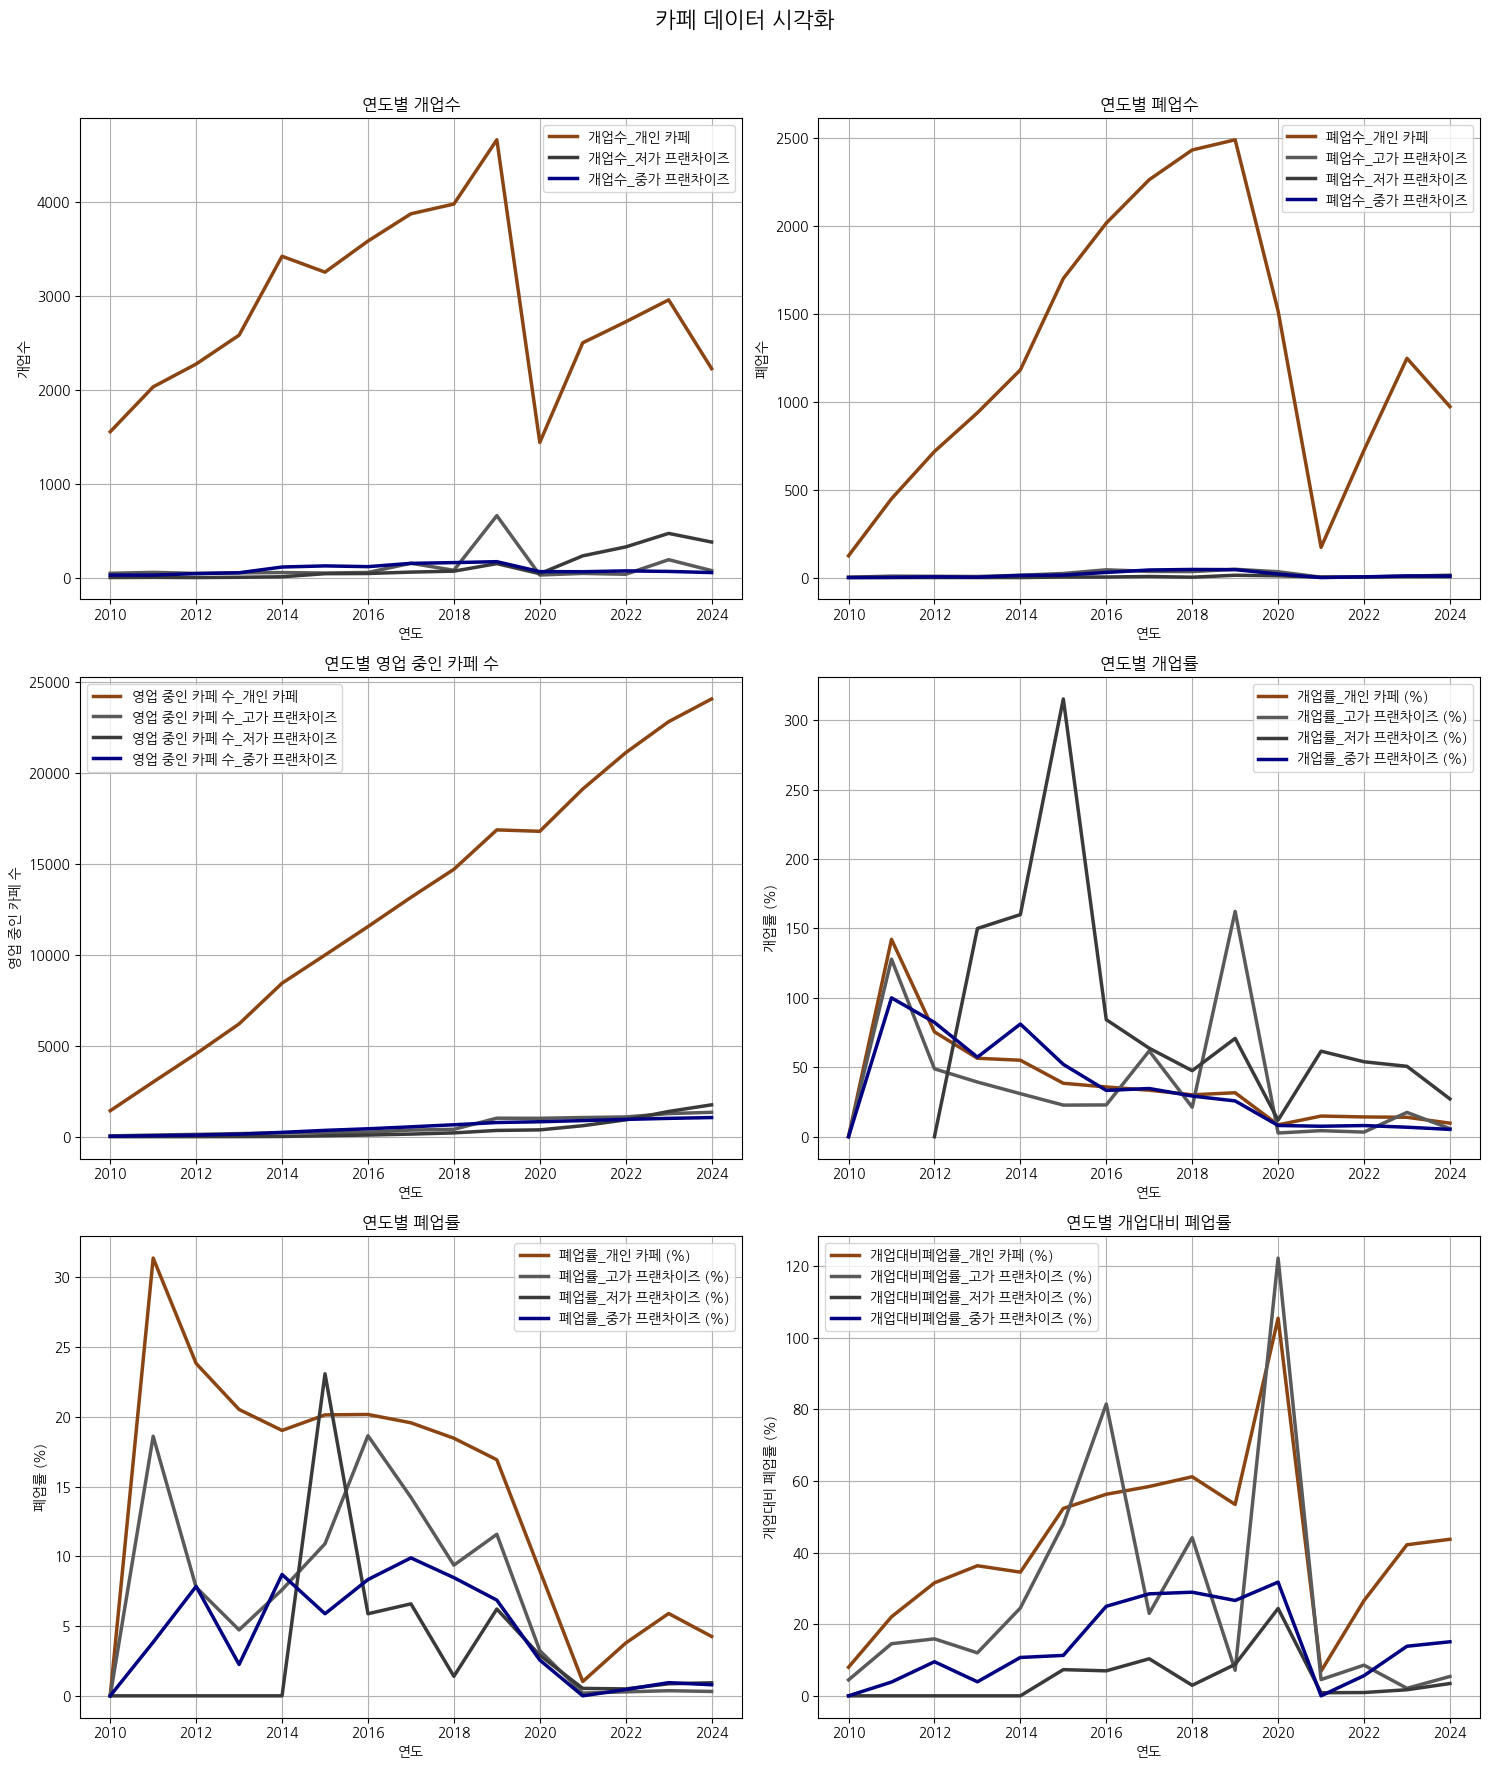

In [334]:
# Plotting each column in each dataset separately to avoid the TypeError
# Using the brown and navy color scheme with thicker lines as requested

fig, axes = plt.subplots(3, 2, figsize=(15, 18))
fig.suptitle('카페 데이터 시각화', fontsize=16)

# Define color scheme
colors = ['#8B4513', '#5A5A5A', '#3A3A3A', '#000080']

# Plot 1: Opening Count
for idx, column in enumerate(data_opening_count.columns):
    axes[0, 0].plot(data_opening_count.index, data_opening_count[column], label=column, color=colors[idx % len(colors)], linewidth=2.5)
axes[0, 0].set_title('연도별 개업수')
axes[0, 0].set_xlabel('연도')
axes[0, 0].set_ylabel('개업수')
axes[0, 0].legend()
axes[0, 0].grid(True)

# Plot 2: Closure Count
for idx, column in enumerate(data_closure_count.columns):
    axes[0, 1].plot(data_closure_count.index, data_closure_count[column], label=column, color=colors[idx % len(colors)], linewidth=2.5)
axes[0, 1].set_title('연도별 폐업수')
axes[0, 1].set_xlabel('연도')
axes[0, 1].set_ylabel('폐업수')
axes[0, 1].legend()
axes[0, 1].grid(True)

# Plot 3: Operating Count
for idx, column in enumerate(data_operating_count.columns):
    axes[1, 0].plot(data_operating_count.index, data_operating_count[column], label=column, color=colors[idx % len(colors)], linewidth=2.5)
axes[1, 0].set_title('연도별 영업 중인 카페 수')
axes[1, 0].set_xlabel('연도')
axes[1, 0].set_ylabel('영업 중인 카페 수')
axes[1, 0].legend()
axes[1, 0].grid(True)

# Plot 4: Opening Rate
for idx, column in enumerate(data_opening_rate.columns):
    axes[1, 1].plot(data_opening_rate.index, data_opening_rate[column], label=column, color=colors[idx % len(colors)], linewidth=2.5)
axes[1, 1].set_title('연도별 개업률')
axes[1, 1].set_xlabel('연도')
axes[1, 1].set_ylabel('개업률 (%)')
axes[1, 1].legend()
axes[1, 1].grid(True)

# Plot 5: Closure Rate
for idx, column in enumerate(data_closure_rate.columns):
    axes[2, 0].plot(data_closure_rate.index, data_closure_rate[column], label=column, color=colors[idx % len(colors)], linewidth=2.5)
axes[2, 0].set_title('연도별 폐업률')
axes[2, 0].set_xlabel('연도')
axes[2, 0].set_ylabel('폐업률 (%)')
axes[2, 0].legend()
axes[2, 0].grid(True)

# Plot 6: Opening to Closure Rate
for idx, column in enumerate(data_opening_to_closure_rate.columns):
    axes[2, 1].plot(data_opening_to_closure_rate.index, data_opening_to_closure_rate[column], label=column, color=colors[idx % len(colors)], linewidth=2.5)
axes[2, 1].set_title('연도별 개업대비 폐업률')
axes[2, 1].set_xlabel('연도')
axes[2, 1].set_ylabel('개업대비 폐업률 (%)')
axes[2, 1].legend()
axes[2, 1].grid(True)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()
